

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Análisis exploratorio de accidentes de tráfico en Barcelona

**Script**: Clasificación | Gravedad accidente

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
import lightgbm as lgb


from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/df_encoded.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(path)

df.shape

(62308, 76)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62308 entries, 0 to 62307
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Numero_expedient                 62308 non-null  object
 1   Codi_carrer                      62308 non-null  int64 
 2   Descripcio_dia_setmana           62308 non-null  int64 
 3   Any                              62308 non-null  int64 
 4   Mes_any                          62308 non-null  int64 
 5   Dia_mes                          62308 non-null  int64 
 6   Hora_dia                         62308 non-null  int64 
 7   Descripcio_torn                  62308 non-null  int64 
 8   Numero_morts                     62308 non-null  int64 
 9   Numero_lesionats_lleus           62308 non-null  int64 
 10  Numero_lesionats_greus           62308 non-null  int64 
 11  Numero_victimes                  62308 non-null  int64 
 12  Numero_vehicles_implicats       

## Elección de la columna y

In [ ]:
df

,Numero_expedient,Descripcio_dia_setmana,Any,Mes_any,Dia_mes,Hora_dia,Descripcio_torn,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Codi_carrer6,Eixample,Sant_Marti,Sants_Montjuic,Sarria_Sant-Gervasi,Horta_Guinardo,Les_Corts,Sant_Andreu,Ciutat_Vella,Nou_Barris,Gracia,Districte_Desconegut,SinCausaMediata,Alcoholemia,CalzadaMalEstado,VelocidadInadecuada,Drogas,ObjetosAnimalesEnCalzada,FactoresMeteorologicos,TA_Colision,TA_Caida,TA_Alcance,TA_Atropello,TA_Otro,TA_ChoqueContraElementoEstático,TA_CaidaInteriorVehiculo,TA_Volcada,TA_SalidaDeVia,TA_Persecución,TA_ChoqueContraAnimal,TV_Taxi,TV_Motocicleta,TV_Automóvil,TV_Autobús,TV_Vehículo_Comercial,TV_Camión,TV_Bicicleta,TV_Vehículo_Personal_Motorizado,TV_Otros,DC_B,DC_Desconegut,DC_A,DC_Otros,AC_0-5,AC_5-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_más de 60,Hombre,Mujer,Desconocido,Edad_1-17,Edad_18-25,Edad_26-35,Edad_36-45,Edad_46-60,Edad_más de 60,TP_Conductor,TP_Pasajero,TP_Peaton,TP_Desconocido
0,2016S000001,5,2016,1,1,0,3,0,1,0,1,2,144601,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,2016S000002,5,2016,1,1,2,3,0,1,0,1,1,194202,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,2016S000003,5,2016,1,1,5,3,0,1,0,1,2,209900,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,2016S000004,5,2016,1,1,6,1,0,3,0,3,2,32700,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,1,2,0,0,0,1,1,1,0,1,1,1,0
4,2016S000005,5,2016,1,1,8,1,0,1,0,1,2,269902,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57503,2022S008011,6,2022,12,31,18,2,0,1,0,1,2,75101,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
57504,2022S008012,2,2022,12,6,10,1,0,1,0,1,2,90502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
57505,2022S008013,6,2022,12,10,1,3,0,1,0,1,2,32700,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
57506,2023S000004,6,2022,12,31,15,2,0,1,0,1,2,279600,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
df['Numero_victimes'].value_counts()

Numero_victimes
 1     41538
 2      8725
 0      4971
 3      1486
 4       454
 5       158
 6        80
 7        40
 8        20
 9        12
 10        8
 11        5
 12        4
 13        3
 24        1
 14        1
 26        1
-1         1
Name: count, dtype: int64

In [ ]:
df['Numero_morts'].value_counts()

Numero_morts
 0    57383
 1      123
 2        1
-1        1
Name: count, dtype: int64

In [ ]:
df['Numero_lesionats_lleus'].value_counts()

Numero_lesionats_lleus
 1     40889
 2      8497
 0      5910
 3      1434
 4       449
 5       161
 6        77
 7        36
 8        20
 9        12
 10        8
 11        4
 12        4
 13        3
 21        1
 14        1
 25        1
-1         1
Name: count, dtype: int64

In [ ]:
df['Numero_lesionats_greus'].value_counts()

Numero_lesionats_greus
 0    56382
 1     1054
 2       66
 3        4
 4        1
-1        1
Name: count, dtype: int64

In [ ]:
df['Numero_victimes'].value_counts()

Numero_victimes
 1     41538
 2      8725
 0      4971
 3      1486
 4       454
 5       158
 6        80
 7        40
 8        20
 9        12
 10        8
 11        5
 12        4
 13        3
 24        1
 14        1
 26        1
-1         1
Name: count, dtype: int64

#Primera Propuesta: Clasificación de Accidentes Graves

## Preprocess

In [3]:
df_classification = df.copy()

df_classification['IndGravedadAccidente'] = 0
df_classification.loc[(df_classification['Numero_morts'] > 0) | (df_classification['Numero_lesionats_greus'] > 0), 'IndGravedadAccidente'] = 1
# | (df_classification['Numero_lesionats_lleus'] >= 5)

In [4]:
df_classification = df_classification.drop(columns=['Numero_expedient', 'Any', 'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Codi_carrer'])

## Correlaciones

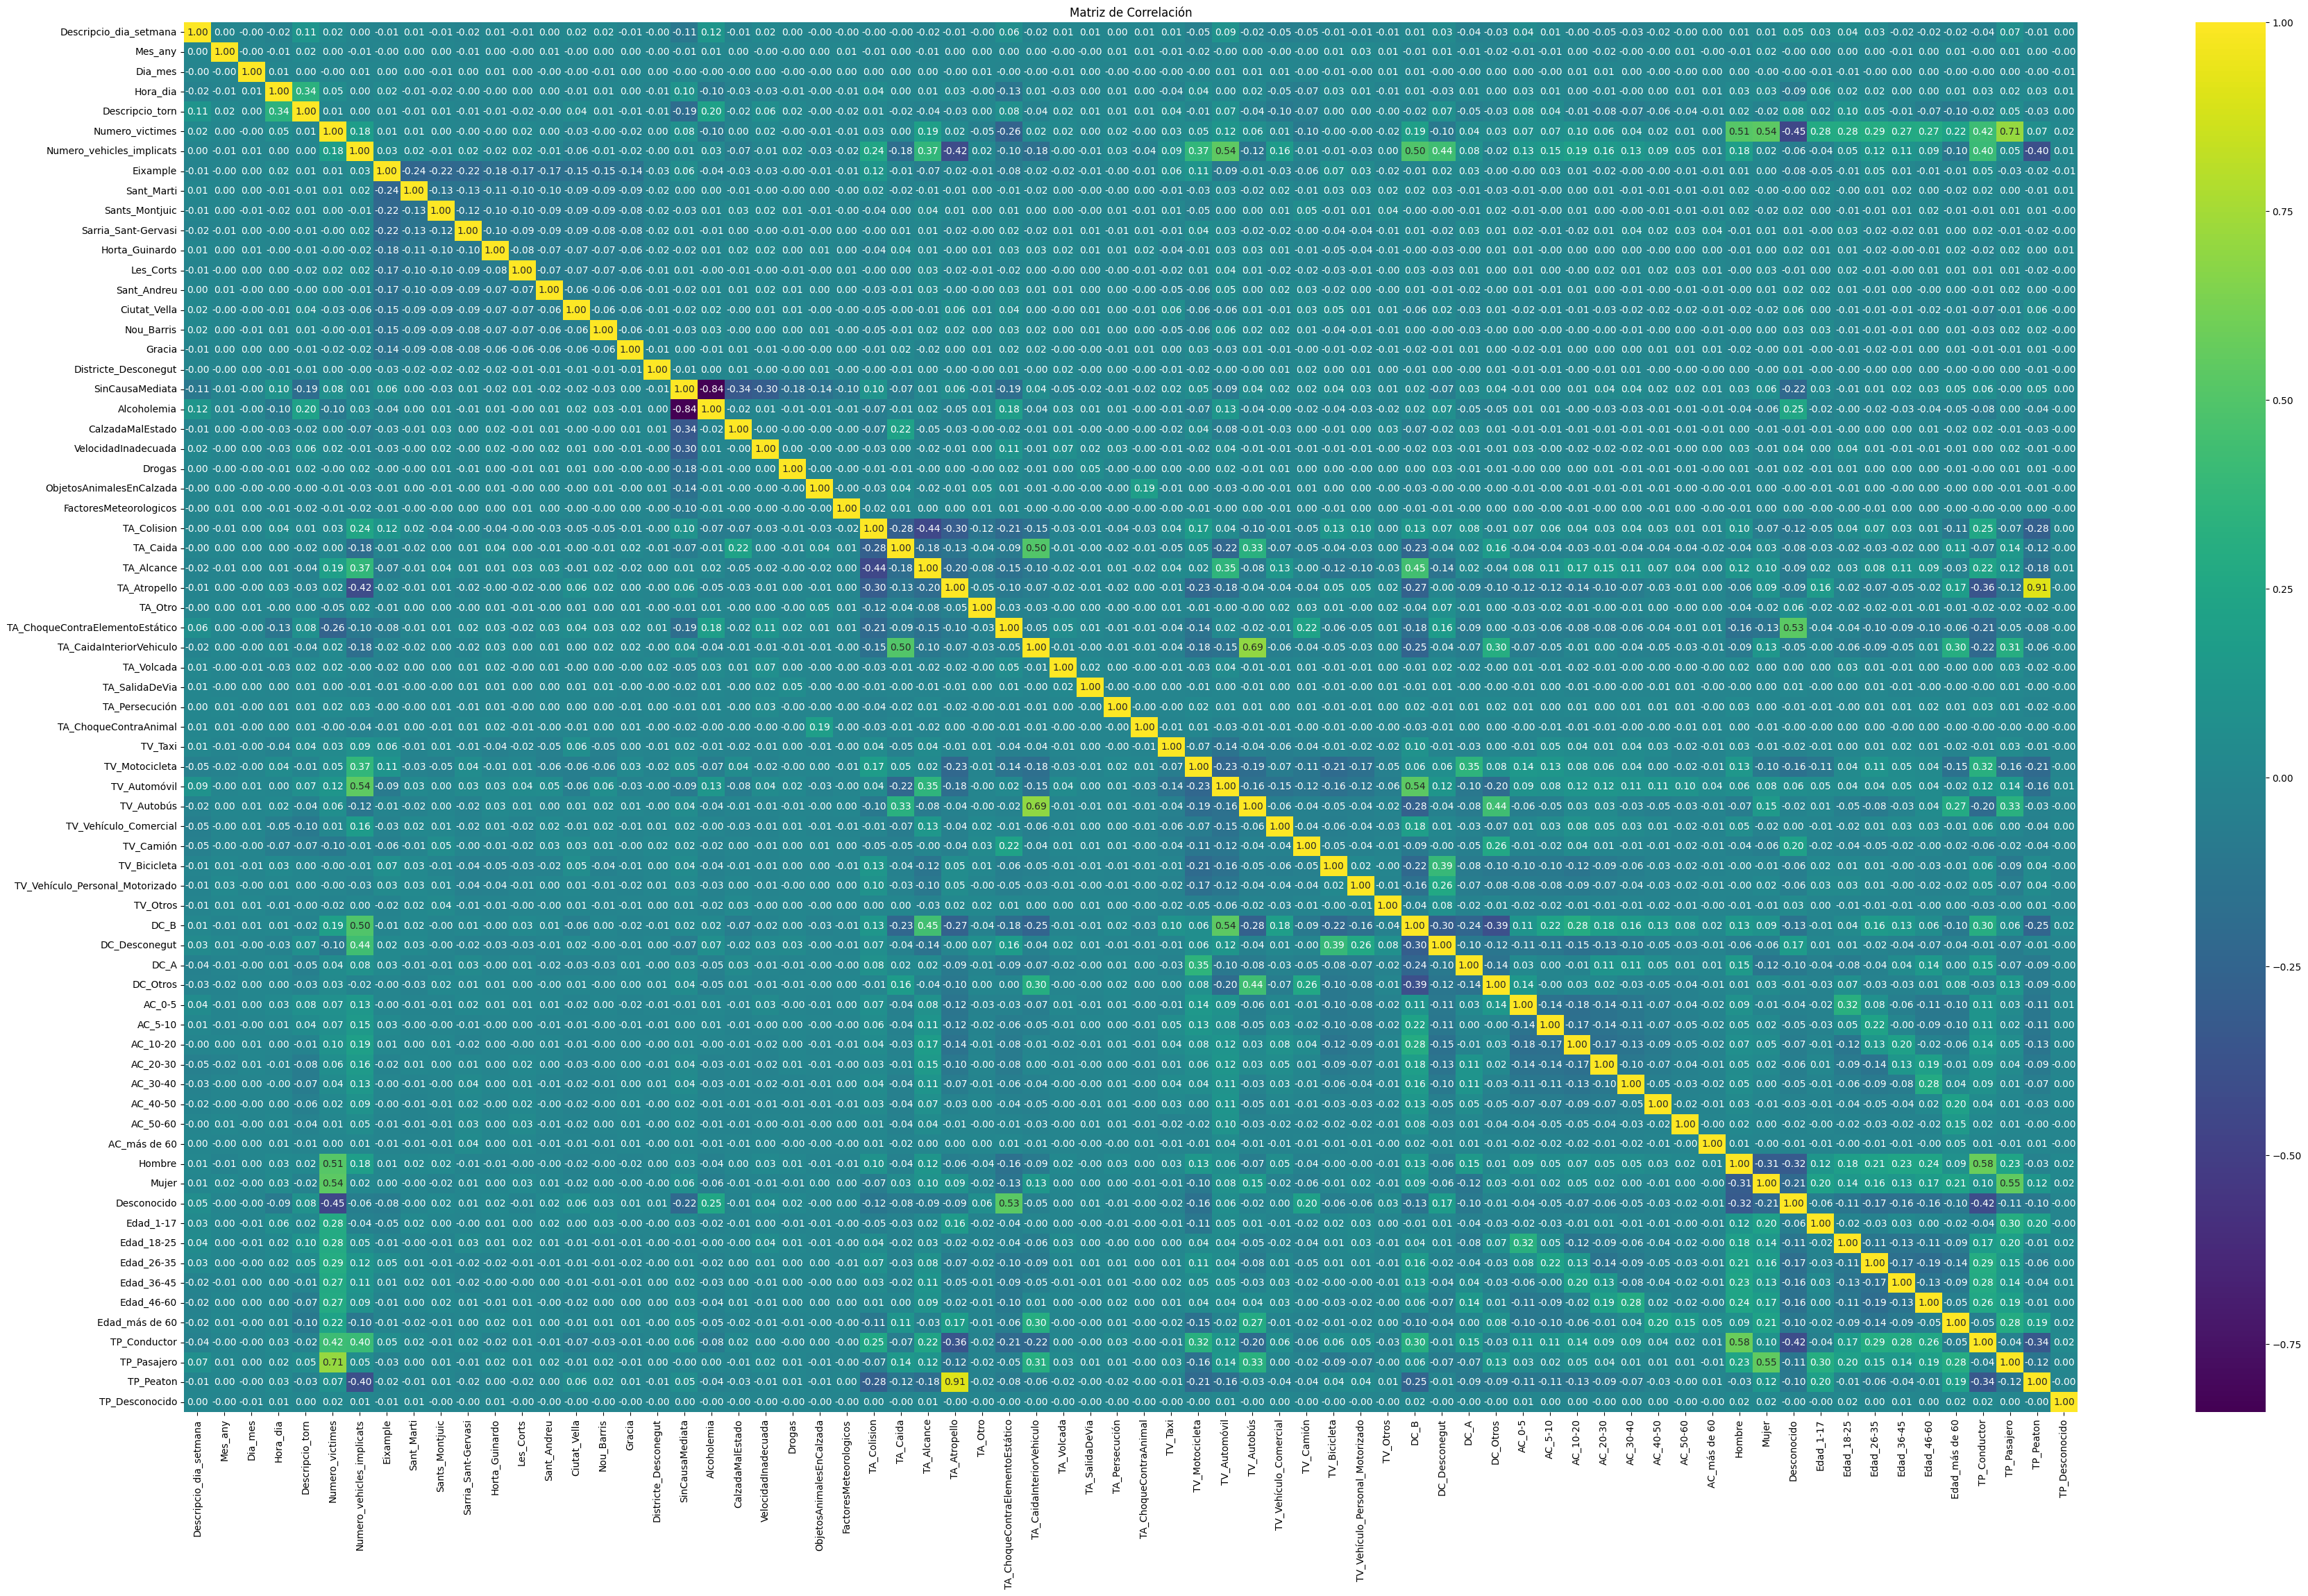

In [ ]:
correlation_matrix = df_classification.corr()
plt.figure(figsize=(44, 26))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### VIF

In [ ]:
# pd.set_option('display.max_rows', None)

In [ ]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_classification.columns
vif_data["VIF"] = [variance_inflation_factor(df_classification.values, i) for i in range(df_classification.shape[1])]

vif_data

,Feature,VIF
0,Descripcio_dia_setmana,4.885380
1,Mes_any,4.242496
2,Dia_mes,3.959621
3,Hora_dia,8.927000
4,Descripcio_torn,9.721047
...,...,...
58,Edad_más de 60,2.211151
59,TP_Pasajero,3.680024
60,TP_Peaton,7.233533
61,TP_Desconocido,1.002885


from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Eliminar las columnas con VIF elevado
df_classification.drop(columns=['Eixample', 'Numero_vehicles_implicats', 'DC_B',#'Hombre',
                                'TP_Conductor', 'TV_Automóvil', 'SinCausaMediata', 'Numero_victimes'], inplace = True)

.

In [ ]:
#df_classification = df_classification.drop(columns=['Districte_Desconegut', 'DC_Desconegut', 'Desconocido', 'TP_Desconocido'])

## Splitting the Dataset

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
features = [x for x in df_classification.columns if x not in 'IndGravedadAccidente']
X_train, X_test, y_train, y_test = train_test_split(df_classification[features], df_classification['IndGravedadAccidente'], test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

# Calcular el valor de scale_pos_weight
scale_pos_weight = ((len(y_train) - y_train.sum()) / (y_train.sum()))

train samples: 49846
validation samples: 12462
target proportion: 0.0229


### Estandarizar

In [7]:
# Inicializar el StandardScaler
scaler = StandardScaler()

# Estandarizar las columnas en X_train
X_train = scaler.fit_transform(X_train)

# Aplicar la misma transformación a X_test
X_test = scaler.transform(X_test)

## XGBoost

In [8]:
n = int(len(X_train)*0.8) # 80% to train and 20% to eval

X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

### Primer modelo

In [ ]:
xgb_model = XGBClassifier(n_estimators=5000, learning_rate=0.1, verbosity=1, random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)], early_stopping_rounds=10)

print(f'\nBest iteration: {xgb_model.best_iteration}')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66583
[1]	validation_0-logloss:0.64557
[2]	validation_0-logloss:0.62905
[3]	validation_0-logloss:0.61458
[4]	validation_0-logloss:0.60309
[5]	validation_0-logloss:0.59248
[6]	validation_0-logloss:0.58400
[7]	validation_0-logloss:0.57655
[8]	validation_0-logloss:0.57034
[9]	validation_0-logloss:0.56404
[10]	validation_0-logloss:0.55894
[11]	validation_0-logloss:0.55402
[12]	validation_0-logloss:0.54979
[13]	validation_0-logloss:0.54597
[14]	validation_0-logloss:0.54303
[15]	validation_0-logloss:0.54000
[16]	validation_0-logloss:0.53716
[17]	validation_0-logloss:0.53235
[18]	validation_0-logloss:0.53005
[19]	validation_0-logloss:0.52733
[20]	validation_0-logloss:0.52378
[21]	validation_0-logloss:0.51945
[22]	validation_0-logloss:0.51491
[23]	validation_0-logloss:0.51040
[24]	validation_0-logloss:0.50852
[25]	validation_0-logloss:0.50491
[26]	validation_0-logloss:0.50134
[27]	validation_0-logloss:0.49932
[28]	validation_0-logloss:0.49725
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Calcular recall y F1-score para los datos de entrenamiento
train_recall = recall_score(y_train, xgb_model.predict(X_train))
train_f1score = f1_score(y_train, xgb_model.predict(X_train))

# Calcular recall y F1-score para los datos de prueba
test_recall = recall_score(y_test, xgb_model.predict(X_test))
test_f1score = f1_score(y_test, xgb_model.predict(X_test))

# Imprimir los resultados
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\n\tRecall: {train_recall:.4f}\n\tF1-score: {train_f1score:.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}\n\tRecall: {test_recall:.4f}\n\tF1-score: {test_f1score:.4f}")

Metrics train:
	Accuracy score: 0.9878
	Recall: 0.8364
	F1-score: 0.7581
Metrics test:
	Accuracy score: 0.9649
	Recall: 0.1545
	F1-score: 0.1479


### Segundo modelo

In [9]:
# Inicializar el modelo XGBoost con los hiperparámetros especificados
xgb_model = XGBClassifier(
    n_estimators=5000,
    learning_rate=0.1,
    verbosity=1,
    random_state=42,
    scale_pos_weight=((len(y_train_fit) - y_train_fit.sum()) / (y_train_fit.sum())),
    max_depth=5,
    max_leaves=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    alpha=0
)

# Entrenar el modelo con los datos de entrenamiento y evaluar con el conjunto de evaluación
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)], early_stopping_rounds=10)

print(f'\nBest iteration: {xgb_model.best_iteration}')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68324
[1]	validation_0-logloss:0.67023
[2]	validation_0-logloss:0.65912
[3]	validation_0-logloss:0.65039
[4]	validation_0-logloss:0.64525
[5]	validation_0-logloss:0.63761
[6]	validation_0-logloss:0.63431
[7]	validation_0-logloss:0.63039
[8]	validation_0-logloss:0.62511
[9]	validation_0-logloss:0.62091
[10]	validation_0-logloss:0.61685
[11]	validation_0-logloss:0.61279
[12]	validation_0-logloss:0.61030
[13]	validation_0-logloss:0.60896
[14]	validation_0-logloss:0.60667
[15]	validation_0-logloss:0.60328
[16]	validation_0-logloss:0.60005
[17]	validation_0-logloss:0.59722
[18]	validation_0-logloss:0.59578
[19]	validation_0-logloss:0.59428
[20]	validation_0-logloss:0.59256
[21]	validation_0-logloss:0.59033
[22]	validation_0-logloss:0.58703
[23]	validation_0-logloss:0.58417
[24]	validation_0-logloss:0.58160
[25]	validation_0-logloss:0.57936
[26]	validation_0-logloss:0.57714
[27]	validation_0-logloss:0.57632
[28]	validation_0-logloss:0.57457
[29]	validation_0-loglos

In [10]:
# Calcular recall y F1-score para los datos de entrenamiento
train_recall = recall_score(y_train, xgb_model.predict(X_train))
train_f1score = f1_score(y_train, xgb_model.predict(X_train))

# Calcular recall y F1-score para los datos de prueba
test_recall = recall_score(y_test, xgb_model.predict(X_test))
test_f1score = f1_score(y_test, xgb_model.predict(X_test))

# Imprimir los resultados
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\n\tRecall: {train_recall:.4f}\n\tF1-score: {train_f1score:.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}\n\tRecall: {test_recall:.4f}\n\tF1-score: {test_f1score:.4f}")

Metrics train:
	Accuracy score: 0.7413
	Recall: 0.7725
	F1-score: 0.1205
Metrics test:
	Accuracy score: 0.7413
	Recall: 0.7602
	F1-score: 0.1039


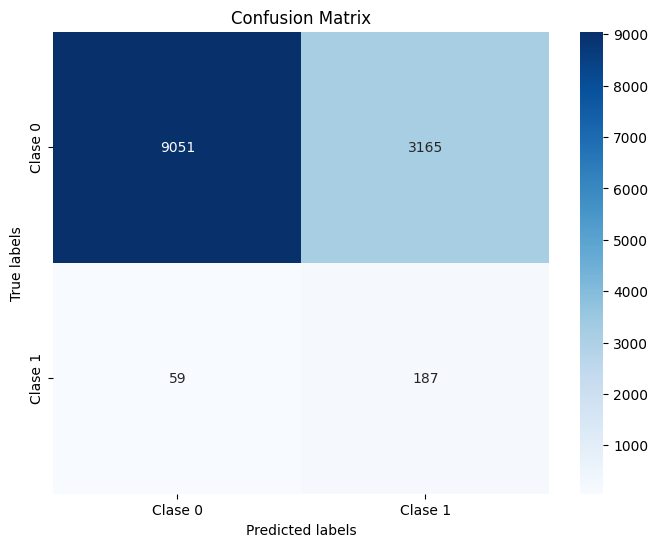

In [11]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = xgb_model.predict(X_test)
#y_pred_binary = (y_pred > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define las etiquetas de las clases
class_labels = ["Clase 0", "Clase 1"]

# Crea la figura y los ejes
plt.figure(figsize=(8, 6))

# Crea la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Añade etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x2000 with 0 Axes>

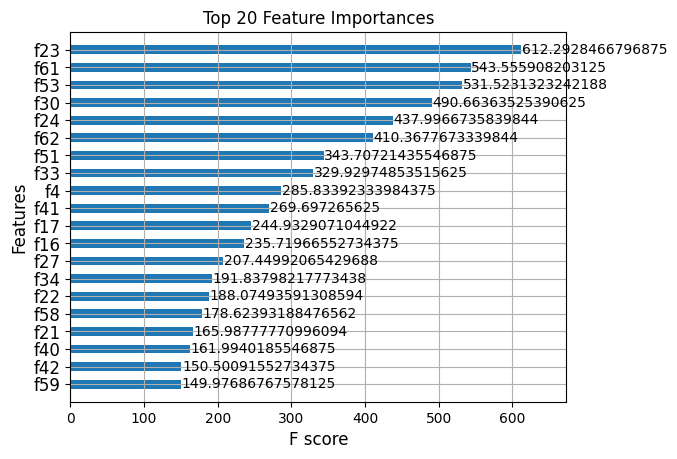

In [ ]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 20))

# Plot de importancia de características horizontal, mostrando solo las top 20
plot_importance(xgb_model, max_num_features=20, importance_type='gain', title='Top 20 Feature Importances', height=0.5)
plt.rcParams.update({'axes.labelsize': 'large'})

# Rotar las etiquetas de los ejes y ajustar el tamaño de las etiquetas
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

<ipython-input-15-35e33cfb2ffb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)


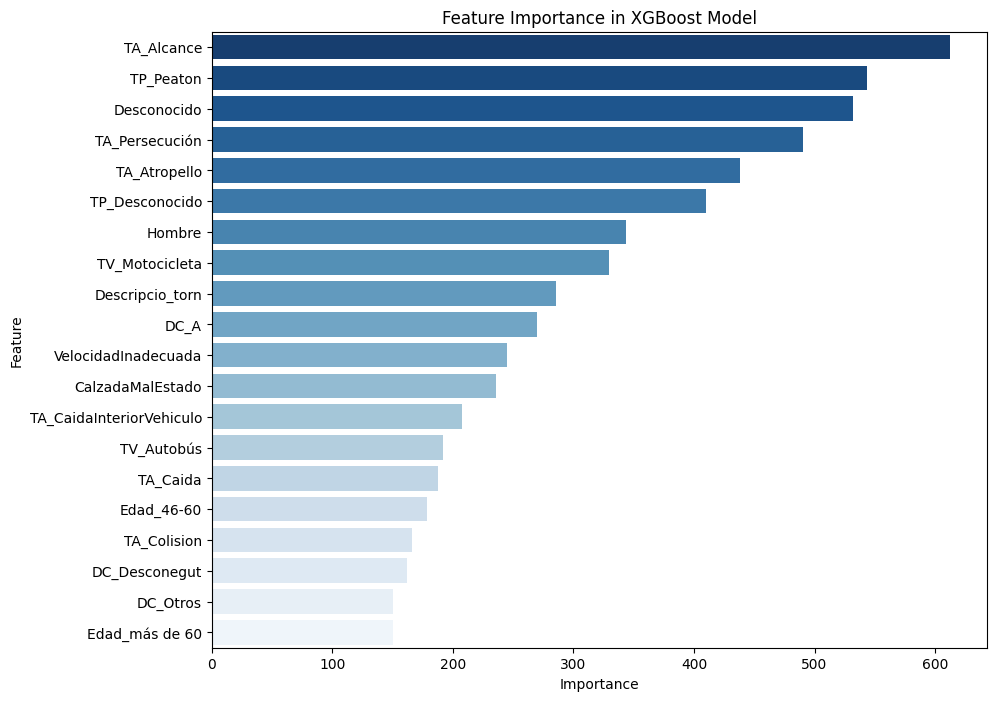

In [15]:
# Extraer la importancia de las características
importance = xgb_model.get_booster().get_score(importance_type='gain')

# Crear un dataframe con los nombres reales de las características
feature_map = {f'f{i}': feature for i, feature in enumerate(df_classification.columns)}

# Crear un dataframe para la importancia de las características
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

# Mapear las etiquetas a los nombres reales
importance_df['Feature'] = importance_df['Feature'].map(feature_map)

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Plotear las top 20 características más importantes
top_features = importance_df.head(20)

# Utilizar la paleta 'Reds' invertida
palette = sns.color_palette("Blues", n_colors=20)[::-1]

sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Tercer modelo

Con balanceo de clases

In [ ]:
# Balancear las clases con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_fit, y_train_fit)

In [ ]:
# Crear una instancia del modelo XGBoost sin scale_pos_weight
xgb_model = XGBClassifier(
    n_estimators=5000,
    learning_rate=0.1,
    verbosity=1,
    random_state=42,
    max_depth=5,
    max_leaves=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    alpha=0
)

# Ajustar el modelo con los datos balanceados
xgb_model.fit(X_train_balanced, y_train_balanced, eval_set=[(X_train_eval, y_train_eval)], early_stopping_rounds=50, verbose=True)
print(f'\nBest iteration: {xgb_model.best_iteration}')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67144
[1]	validation_0-logloss:0.65435
[2]	validation_0-logloss:0.63656
[3]	validation_0-logloss:0.62462
[4]	validation_0-logloss:0.61499
[5]	validation_0-logloss:0.60038
[6]	validation_0-logloss:0.59297
[7]	validation_0-logloss:0.58294
[8]	validation_0-logloss:0.56917
[9]	validation_0-logloss:0.56256
[10]	validation_0-logloss:0.55058
[11]	validation_0-logloss:0.53975
[12]	validation_0-logloss:0.53428
[13]	validation_0-logloss:0.52566
[14]	validation_0-logloss:0.51678
[15]	validation_0-logloss:0.51247
[16]	validation_0-logloss:0.50347
[17]	validation_0-logloss:0.49530
[18]	validation_0-logloss:0.48695
[19]	validation_0-logloss:0.48210
[20]	validation_0-logloss:0.47537
[21]	validation_0-logloss:0.46737
[22]	validation_0-logloss:0.46131
[23]	validation_0-logloss:0.45890
[24]	validation_0-logloss:0.45208
[25]	validation_0-logloss:0.44229
[26]	validation_0-logloss:0.43611
[27]	validation_0-logloss:0.42961
[28]	validation_0-logloss:0.42414
[29]	validation_0-loglos

In [ ]:
# Realizar predicciones con el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[12207     9]
 [  220    26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12216
           1       0.74      0.11      0.19       246

    accuracy                           0.98     12462
   macro avg       0.86      0.55      0.59     12462
weighted avg       0.98      0.98      0.97     12462



<Figure size 1000x2000 with 0 Axes>

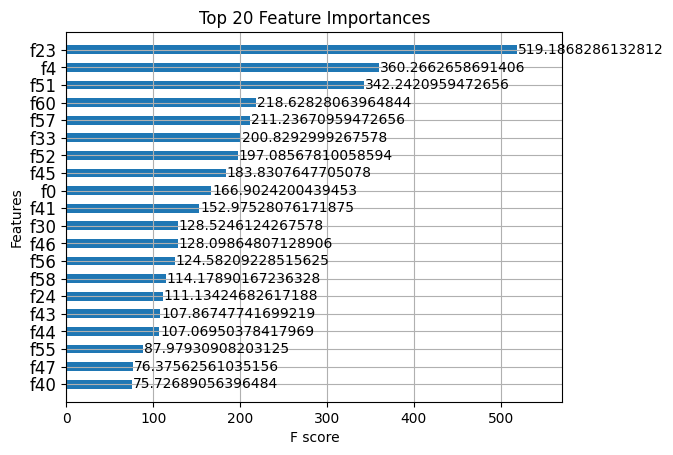

In [ ]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 20))

# Plot de importancia de características horizontal, mostrando solo las top 20
plot_importance(xgb_model, max_num_features=20, importance_type='gain', title='Top 20 Feature Importances', height=0.5)
plt.rcParams.update({'axes.labelsize': 'large'})

# Rotar las etiquetas de los ejes y ajustar el tamaño de las etiquetas
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

<ipython-input-129-226c82f40972>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)


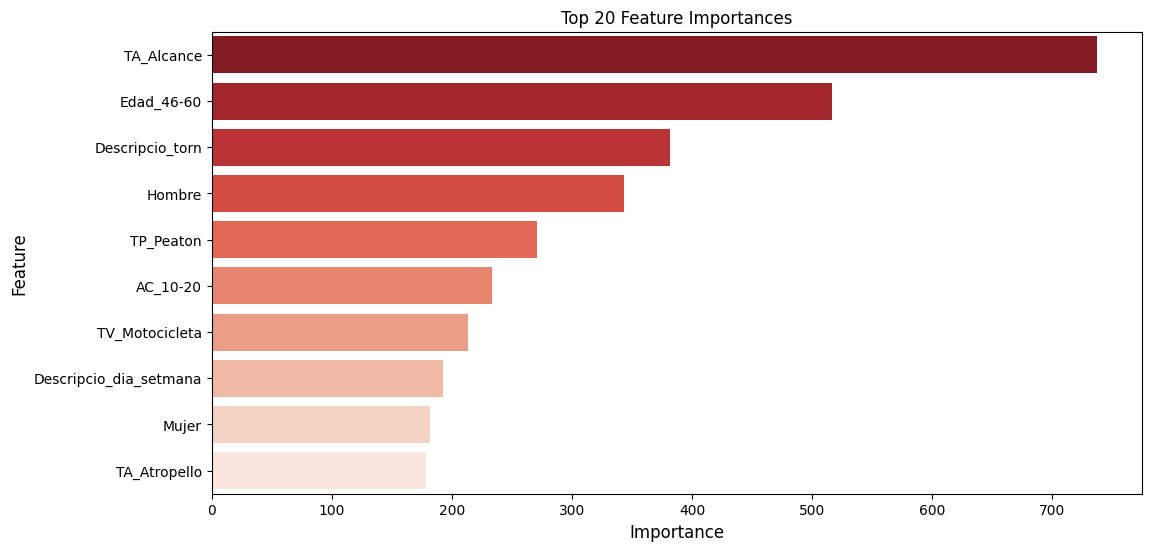

In [ ]:
# Extraer la importancia de las características
importance = xgb_model.get_booster().get_score(importance_type='gain')

# Crear un dataframe con los nombres reales de las características
feature_map = {f'f{i}': feature for i, feature in enumerate(df_classification.columns)}

# Crear un dataframe para la importancia de las características
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

# Mapear las etiquetas a los nombres reales
importance_df['Feature'] = importance_df['Feature'].map(feature_map)

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Plotear las top 20 características más importantes
top_features = importance_df.head(10)

sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Neural Network

### Primer modelo

In [ ]:
# Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas y función de activación ReLU
    Dense(32, activation='relu'),  # Capa oculta con 32 neuronas y función de activación ReLU
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para la clasificación binaria y función de activación sigmoide
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
recall = result[2]

print(f'Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}')


Epoch 1/50
1438/1438 [==============================] - 7s 3ms/step - loss: 0.1047 - accuracy: 0.9784 - recall: 0.0000e+00 - val_loss: 0.0974 - val_accuracy: 0.9781 - val_recall: 0.0040
Epoch 2/50
1438/1438 [==============================] - 6s 4ms/step - loss: 0.0955 - accuracy: 0.9786 - recall: 0.0061 - val_loss: 0.0949 - val_accuracy: 0.9782 - val_recall: 0.0079
Epoch 3/50
1438/1438 [==============================] - 9s 6ms/step - loss: 0.0917 - accuracy: 0.9785 - recall: 0.0091 - val_loss: 0.0928 - val_accuracy: 0.9782 - val_recall: 0.0356
Epoch 4/50
1438/1438 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9788 - recall: 0.0263 - val_loss: 0.0885 - val_accuracy: 0.9784 - val_recall: 0.0316
Epoch 5/50
1438/1438 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9789 - recall: 0.0415 - val_loss: 0.0896 - val_accuracy: 0.9780 - val_recall: 0.0316
Epoch 6/50
1438/1438 [==============================] - 5s 3ms/step - loss: 0.0855 - a

ValueError: too many values to unpack (expected 2)

In [ ]:
# Obtener las predicciones del modelo en los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias

y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias

# Calcular el recall y el F1-score en los conjuntos de entrenamiento y prueba
train_recall = recall_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)

test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)

print(f'Train Recall: {train_recall}')
print(f'Train F1-score: {train_f1}')

print(f'Test Recall: {test_recall}')
print(f'Test F1-score: {test_f1}')

360/360 [==============================] - 0s 1ms/step
Train Recall: 0.38866396761133604
Train F1-score: 0.5521207764198419
Test Recall: 0.1225296442687747
Test F1-score: 0.18562874251497005


### Segundo modelo

In [ ]:
# Define la arquitectura de la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 128 neuronas y función de activación ReLU
    Dropout(0.5),  # Añade dropout para regularización
    Dense(64, activation='relu'),  # Capa oculta con 64 neuronas y función de activación ReLU
    Dropout(0.5),  # Añade dropout para regularización
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para la clasificación binaria y función de activación sigmoide
])

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evalúa el modelo
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
recall = result[2]

print(f'Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}')


Epoch 1/50
1438/1438 [==============================] - 8s 4ms/step - loss: 0.1392 - accuracy: 0.9763 - recall_1: 0.0000e+00 - val_loss: 0.1099 - val_accuracy: 0.9780 - val_recall_1: 0.0000e+00
Epoch 2/50
1438/1438 [==============================] - 9s 6ms/step - loss: 0.1083 - accuracy: 0.9785 - recall_1: 0.0000e+00 - val_loss: 0.1031 - val_accuracy: 0.9780 - val_recall_1: 0.0000e+00
Epoch 3/50
1438/1438 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9785 - recall_1: 0.0000e+00 - val_loss: 0.0969 - val_accuracy: 0.9780 - val_recall_1: 0.0000e+00
Epoch 4/50
1438/1438 [==============================] - 3s 2ms/step - loss: 0.1000 - accuracy: 0.9785 - recall_1: 0.0000e+00 - val_loss: 0.0968 - val_accuracy: 0.9780 - val_recall_1: 0.0000e+00
Epoch 5/50
1438/1438 [==============================] - 5s 3ms/step - loss: 0.0979 - accuracy: 0.9785 - recall_1: 0.0000e+00 - val_loss: 0.0937 - val_accuracy: 0.9780 - val_recall_1: 0.0000e+00
Epoch 6/50
1438/1438 [========

In [ ]:
# Obtiene las predicciones del modelo en los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias

y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype("int32")  # Convertir las probabilidades en clases binarias

# Calcula el recall y el F1-score en los conjuntos de entrenamiento y prueba
train_recall = recall_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)

test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)

print(f'Train Recall: {train_recall}')
print(f'Train F1-score: {train_f1}')

print(f'Test Recall: {test_recall}')
print(f'Test F1-score: {test_f1}')

360/360 [==============================] - 1s 2ms/step
Train Recall: 0.11842105263157894
Train F1-score: 0.2085561497326203
Test Recall: 0.05928853754940711
Test F1-score: 0.1090909090909091


## SVM

## Logistic Regression

### Primer modelo

In [ ]:
# Crear una instancia del modelo de regresión logística
logistic_model = LogisticRegression(max_iter=100000)

# Ajustar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = logistic_model.predict(X_test)

In [ ]:
# Calcular recall y F1-score para los datos de entrenamiento
train_recall = recall_score(y_train, logistic_model.predict(X_train))
train_f1score = f1_score(y_train, logistic_model.predict(X_train))

# Calcular recall y F1-score para los datos de prueba
test_recall = recall_score(y_test, logistic_model.predict(X_test))
test_f1score = f1_score(y_test, logistic_model.predict(X_test))

# Imprimir los resultados
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(logistic_model.predict(X_train),y_train):.4f}\n\tRecall: {train_recall:.4f}\n\tF1-score: {train_f1score:.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(logistic_model.predict(X_test),y_test):.4f}\n\tRecall: {test_recall:.4f}\n\tF1-score: {test_f1score:.4f}")

Metrics train:
	Accuracy score: 0.9775
	Recall: 0.0586
	F1-score: 0.1065
Metrics test:
	Accuracy score: 0.9811
	Recall: 0.0854
	F1-score: 0.1511


### Segundo modelo

In [ ]:
# Crear una instancia del modelo de regresión logística con otro solver
logistic_model = LogisticRegression(solver='newton-cg')  # probar con 'liblinear', 'saga', 'newton-cg', etc.

# Ajustar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = logistic_model.predict(X_test)

In [ ]:
# Calcular recall y F1-score para los datos de entrenamiento
train_recall = recall_score(y_train, logistic_model.predict(X_train))
train_f1score = f1_score(y_train, logistic_model.predict(X_train))

# Calcular recall y F1-score para los datos de prueba
test_recall = recall_score(y_test, logistic_model.predict(X_test))
test_f1score = f1_score(y_test, logistic_model.predict(X_test))

# Imprimir los resultados
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(logistic_model.predict(X_train),y_train):.4f}\n\tRecall: {train_recall:.4f}\n\tF1-score: {train_f1score:.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(logistic_model.predict(X_test),y_test):.4f}\n\tRecall: {test_recall:.4f}\n\tF1-score: {test_f1score:.4f}")

Metrics train:
	Accuracy score: 0.9775
	Recall: 0.0586
	F1-score: 0.1065
Metrics test:
	Accuracy score: 0.9811
	Recall: 0.0854
	F1-score: 0.1511


## Light GVM

### Primer modelo

In [ ]:
# Crear el dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Configurar los parámetros del modelo
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'binary_logloss',
    'scale_pos_weight': scale_pos_weight,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_round': 10
}

# Entrenar el modelo
num_round = 1000
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[test_data], valid_names=['validation'])

# Predicciones
## Predicciones para el conjunto de prueba
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test_binary = [1 if x > 0.5 else 0 for x in y_pred_test]

## Predicciones para el conjunto de entrenamiento
y_pred_train = bst.predict(X_train_smote, num_iteration=bst.best_iteration)
y_pred_train_binary = [1 if x > 0.5 else 0 for x in y_pred_train]

[LightGBM] [Info] Number of positive: 1143, number of negative: 48703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.173465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 49846, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.022931 -> initscore=-3.752084
[LightGBM] [Info] Start training from score -3.752084
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	validation's binary_logloss: 0.103475


In [ ]:
# Evaluar el modelo para el conjunto de entrenamiento
print("Evaluación para el conjunto de entrenamiento:")
#print(classification_report(y_train_smote, y_pred_train_binary))
train_accuracy = accuracy_score(y_train_smote, y_pred_train_binary)
train_recall = recall_score(y_train_smote, y_pred_train_binary)
train_f1 = f1_score(y_train_smote, y_pred_train_binary)
print(f"Accuracy (train): {train_accuracy:.4f}")
print(f"Recall (train): {train_recall:.4f}")
print(f"F1 Score (train): {train_f1:.4f}")

# Evaluar el modelo para el conjunto de prueba
print("\nEvaluación para el conjunto de prueba:")
#print(classification_report(y_test, y_pred_test_binary))
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)
print(f"Accuracy (test): {test_accuracy:.4f}")
print(f"Recall (test): {test_recall:.4f}")
print(f"F1 Score (test): {test_f1:.4f}")



Evaluación para el conjunto de entrenamiento:
Accuracy (train): 0.5000
Recall (train): 0.0000
F1 Score (train): 0.0000

Evaluación para el conjunto de prueba:
Accuracy (test): 0.9803
Recall (test): 0.0000
F1 Score (test): 0.0000


### Segundo modelo

In [ ]:
# Usar SMOTE para sobremuestrear la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear el dataset de LightGBM
train_data = lgb.Dataset(X_train_smote, label=y_train_smote)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Configurar los parámetros del modelo
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'binary_logloss',
    'scale_pos_weight': scale_pos_weight,  # Aunque SMOTE equilibra las clases, mantenemos este ajuste
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_round': 10
}

# Entrenar el modelo
num_round = 100
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[test_data], valid_names=['validation'])

# Predicciones
## Predicciones para el conjunto de prueba
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test_binary = [1 if x > 0.5 else 0 for x in y_pred_test]

## Predicciones para el conjunto de entrenamiento
y_pred_train = bst.predict(X_train_smote, num_iteration=bst.best_iteration)
y_pred_train_binary = [1 if x > 0.5 else 0 for x in y_pred_train]

[LightGBM] [Info] Number of positive: 48703, number of negative: 48703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.690160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 97406, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	validation's binary_logloss: 0.707723


In [ ]:
# Evaluar el modelo para el conjunto de entrenamiento
print("Evaluación para el conjunto de entrenamiento:")
#print(classification_report(y_train_smote, y_pred_train_binary))
train_accuracy = accuracy_score(y_train_smote, y_pred_train_binary)
train_recall = recall_score(y_train_smote, y_pred_train_binary)
train_f1 = f1_score(y_train_smote, y_pred_train_binary)
print(f"Accuracy (train): {train_accuracy:.4f}")
print(f"Recall (train): {train_recall:.4f}")
print(f"F1 Score (train): {train_f1:.4f}")

# Evaluar el modelo para el conjunto de prueba
print("\nEvaluación para el conjunto de prueba:")
#print(classification_report(y_test, y_pred_test_binary))
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)
print(f"Accuracy (test): {test_accuracy:.4f}")
print(f"Recall (test): {test_recall:.4f}")
print(f"F1 Score (test): {test_f1:.4f}")



Evaluación para el conjunto de entrenamiento:
Accuracy (train): 0.6923
Recall (train): 0.9984
F1 Score (train): 0.7644

Evaluación para el conjunto de prueba:
Accuracy (test): 0.3894
Recall (test): 0.9228
F1 Score (test): 0.0563


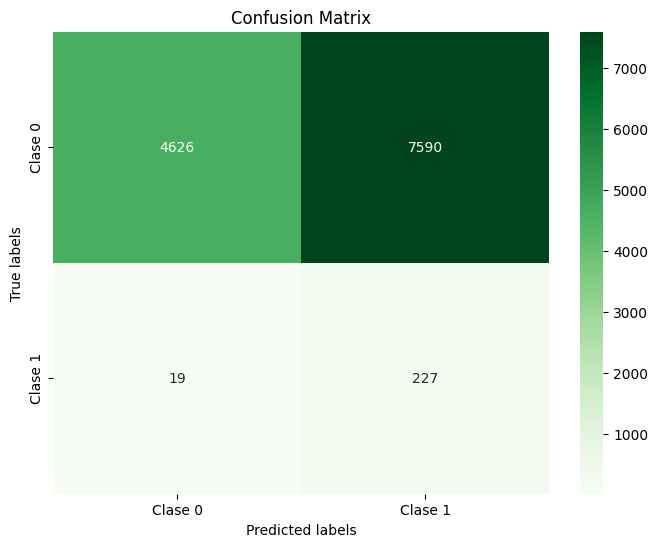

In [ ]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test_binary)

# Define las etiquetas de las clases
class_labels = ["Clase 0", "Clase 1"]

# Crea la figura y los ejes
plt.figure(figsize=(8, 6))

# Crea la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)

# Añade etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-52-2026320ed682>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette=palette)


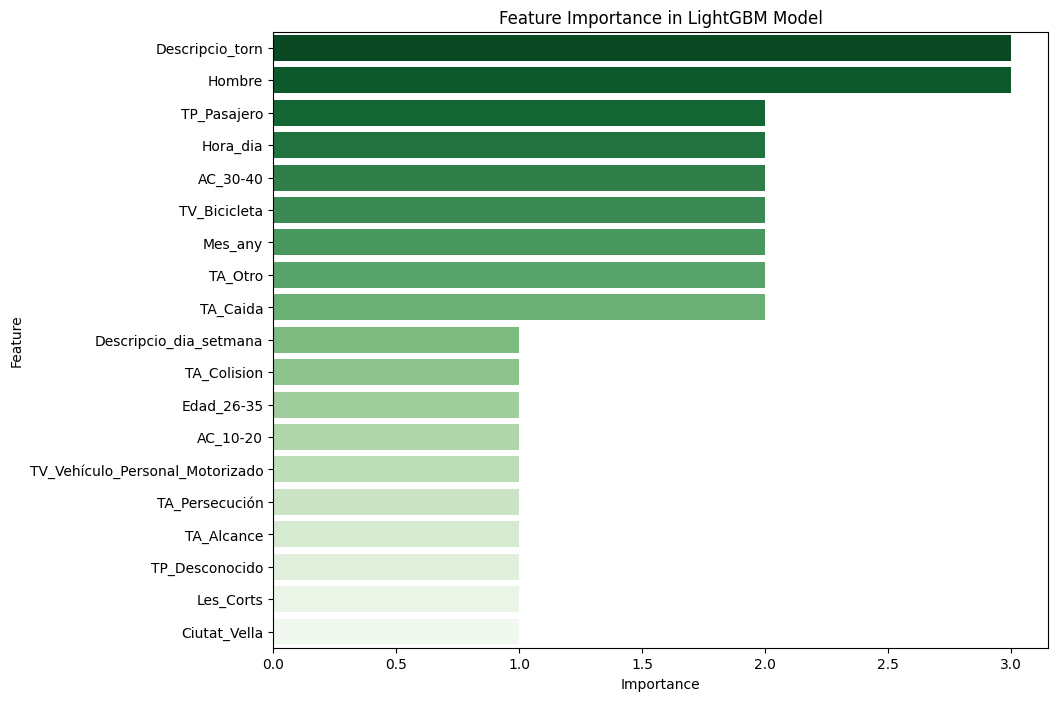

In [ ]:
# Obtener la importancia de las características
feature_importance = bst.feature_importance()
feature_names = features

# Crear un DataFrame para la importancia de las características
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False).head(19)

palette = sns.color_palette("Greens", n_colors=19)[::-1]

# Plot de la importancia de las características usando seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=palette)
plt.title('Feature Importance in LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

[LightGBM] [Info] Number of positive: 48703, number of negative: 48703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.233830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 97406, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	train's binary_logloss: 0.67702	validation's binary_logloss: 0.707723


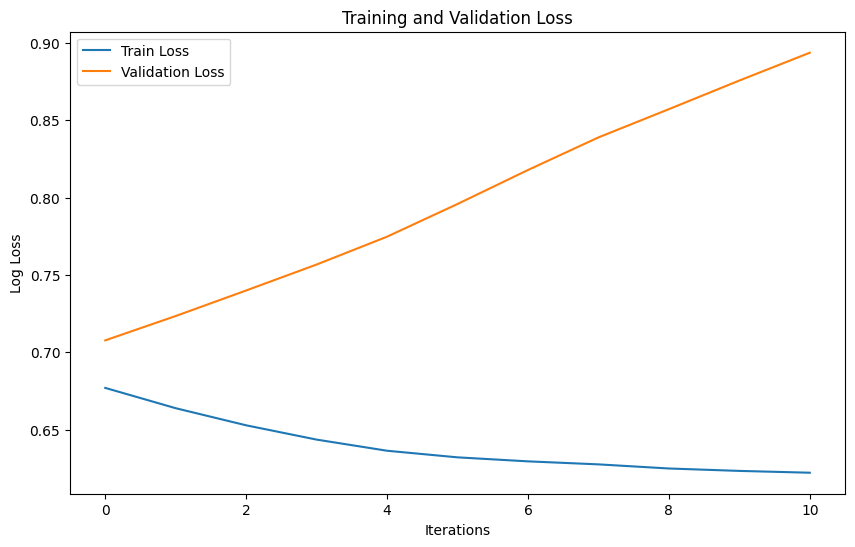

In [ ]:
# Crear diccionario para almacenar los resultados de entrenamiento
evals_result = {'train': [], 'validation': []}

# Definir un callback para capturar las métricas
def log_evaluation(period=1):
    def _callback(env):
        if period > 0 and env.iteration % period == 0:
            evals_result['train'].append(env.evaluation_result_list[0][2])
            evals_result['validation'].append(env.evaluation_result_list[1][2])
    return _callback

# Entrenar el modelo
num_round = 100
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[train_data, test_data], valid_names=['train', 'validation'], callbacks=[log_evaluation(), lgb.early_stopping(stopping_rounds=10)])

# Predicciones para el conjunto de prueba
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test_binary = [1 if x > 0.5 else 0 for x in y_pred_test]

# Predicciones para el conjunto de entrenamiento
y_pred_train = bst.predict(X_train_smote, num_iteration=bst.best_iteration)
y_pred_train_binary = [1 if x > 0.5 else 0 for x in y_pred_train]

# Plot de la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train'], label='Train Loss')
plt.plot(evals_result['validation'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 48703, number of negative: 48703
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 97406, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	train's binary_logloss: 0.691873	validation's binary_logloss: 0.695351
Evaluación para el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46     12216
           1       0.03      0.98      0.05       246

    accuracy                           0.31     12462
   macro avg       0.51      0.64      0.26     12462
weighted avg       0.98      0.31      0.45     12462

Accuracy (test): 0.3142

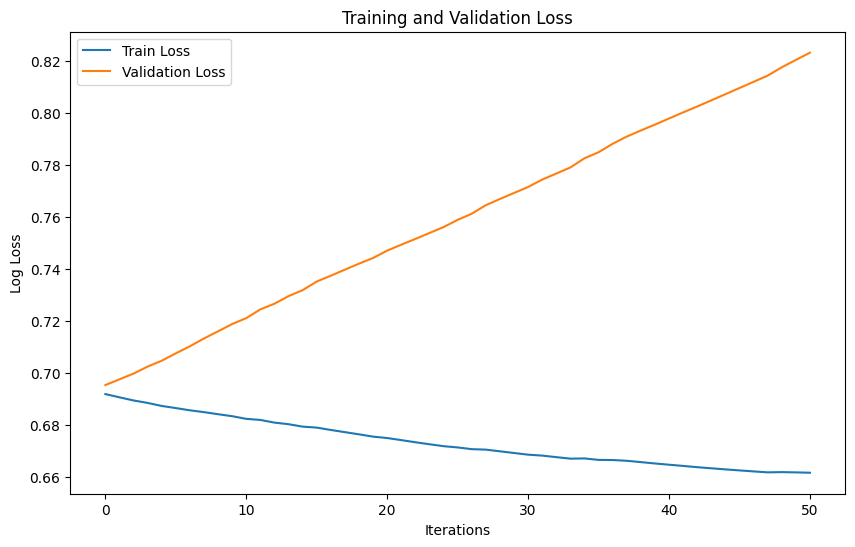

In [ ]:
# Usar SMOTE para sobremuestrear la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear el dataset de LightGBM
train_data = lgb.Dataset(X_train_smote, label=y_train_smote)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Configurar los parámetros del modelo ajustados
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'binary_logloss',
    'scale_pos_weight': scale_pos_weight,
    'num_leaves': 10,
    'learning_rate': 0.005,
    'feature_fraction': 0.8,
    'lambda_l1': 0.5,
    'lambda_l2': 0.5
}

# Crear diccionario para almacenar los resultados de entrenamiento
evals_result = {'train': [], 'validation': []}

# Definir un callback para capturar las métricas
def log_evaluation(period=1):
    def _callback(env):
        if period > 0 and env.iteration % period == 0:
            evals_result['train'].append(env.evaluation_result_list[0][2])
            evals_result['validation'].append(env.evaluation_result_list[1][2])
    return _callback

# Entrenar el modelo
num_round = 2000
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[train_data, test_data], valid_names=['train', 'validation'], callbacks=[log_evaluation(), lgb.early_stopping(stopping_rounds=50)])

# Predicciones para el conjunto de prueba
y_pred_test = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_test_binary = [1 if x > 0.5 else 0 for x in y_pred_test]

# Predicciones para el conjunto de entrenamiento
y_pred_train = bst.predict(X_train_smote, num_iteration=bst.best_iteration)
y_pred_train_binary = [1 if x > 0.5 else 0 for x in y_pred_train]

# Evaluar el modelo para el conjunto de prueba
print("Evaluación para el conjunto de prueba:")
print(classification_report(y_test, y_pred_test_binary))
test_accuracy = accuracy_score(y_test, y_pred_test_binary)
test_recall = recall_score(y_test, y_pred_test_binary)
test_f1 = f1_score(y_test, y_pred_test_binary)
print(f"Accuracy (test): {test_accuracy:.4f}")
print(f"Recall (test): {test_recall:.4f}")
print(f"F1 Score (test): {test_f1:.4f}")

# Evaluar el modelo para el conjunto de entrenamiento
print("Evaluación para el conjunto de entrenamiento:")
print(classification_report(y_train_smote, y_pred_train_binary))
train_accuracy = accuracy_score(y_train_smote, y_pred_train_binary)
train_recall = recall_score(y_train_smote, y_pred_train_binary)
train_f1 = f1_score(y_train_smote, y_pred_train_binary)
print(f"Accuracy (train): {train_accuracy:.4f}")
print(f"Recall (train): {train_recall:.4f}")
print(f"F1 Score (train): {train_f1:.4f}")

# Plot de la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train'], label='Train Loss')
plt.plot(evals_result['validation'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#Segunda Propuesta: Predicción del numero de Victimas

In [ ]:
df_classification =df.copy()

El objetivo aquí va a ser realizar una tarea de regresion que nos permita pronosticar el numero total de victimas en un accidente.

In [ ]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62308 entries, 0 to 62307
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Numero_expedient                 62308 non-null  object
 1   Codi_carrer                      62308 non-null  int64 
 2   Descripcio_dia_setmana           62308 non-null  int64 
 3   Any                              62308 non-null  int64 
 4   Mes_any                          62308 non-null  int64 
 5   Dia_mes                          62308 non-null  int64 
 6   Hora_dia                         62308 non-null  int64 
 7   Descripcio_torn                  62308 non-null  int64 
 8   Numero_morts                     62308 non-null  int64 
 9   Numero_lesionats_lleus           62308 non-null  int64 
 10  Numero_lesionats_greus           62308 non-null  int64 
 11  Numero_victimes                  62308 non-null  int64 
 12  Numero_vehicles_implicats       

In [ ]:
# Definir las características (X) excluyendo la columna objetivo
X = df_classification.drop(columns=['Numero_victimes','Numero_expedient','TP_Conductor','TP_Pasajero','Edad_más de 60','Edad_más de 60',
'Eixample','Sant_Marti','Sants_Montjuic','Sarria_Sant-Gervasi','Horta_Guinardo','Les_Corts','Sant_Andreu','Ciutat_Vella','Nou_Barris','Districte_Desconegut','Any','SinCausaMediata',
'Numero_vehicles_implicats','DC_B','TV_Automóvil','Numero_lesionats_lleus'])

# Calcular el VIF para todas las características en el DataFrame X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Visualizar el resultado
vif_data

,Feature,VIF
0,Codi_carrer,2.585738
1,Descripcio_dia_setmana,4.865321
2,Mes_any,4.238782
3,Dia_mes,3.949066
4,Hora_dia,8.910121
5,Descripcio_torn,9.708150
6,Numero_morts,1.015116
7,Numero_lesionats_greus,1.085770
8,Gracia,1.055537
9,Alcoholemia,1.220447


###Regresion Lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#eliminamos tambien las columnas que tienen relacion con el numero de victimas (numero lesionados leves, graves y fallecidos)

X = df_classification.drop(columns=['Numero_victimes','Numero_expedient','TP_Conductor','TP_Pasajero','Edad_más de 60','Edad_más de 60',
'Eixample','Sant_Marti','Sants_Montjuic','Sarria_Sant-Gervasi','Horta_Guinardo','Les_Corts','Sant_Andreu','Ciutat_Vella','Nou_Barris','Districte_Desconegut','Any','SinCausaMediata',
'Numero_vehicles_implicats','DC_B','TV_Automóvil','Numero_lesionats_lleus','Numero_lesionats_greus','Numero_morts'])
y = df_classification['Numero_victimes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)


Error cuadrático medio: 0.11445283693043191


Métricas de evaluación:
MAE (Error absoluto medio): 0.1716355220008775
MSE (Error cuadrático medio): 0.11445283693043191
RMSE (Raíz del error cuadrático medio): 0.3383087893189178
R^2 (Coeficiente de determinación): 0.8058955462557146


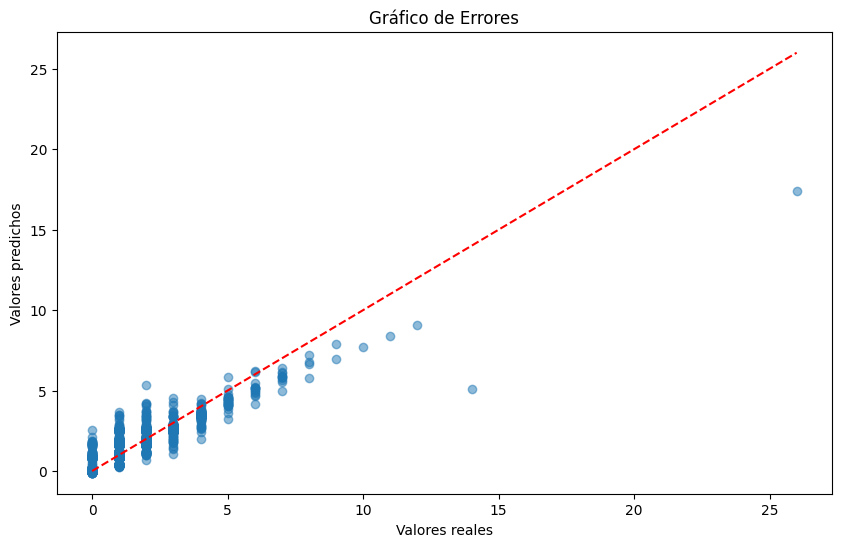

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Métricas de evaluación:')
print('MAE (Error absoluto medio):', mae)
print('MSE (Error cuadrático medio):', mse)
print('RMSE (Raíz del error cuadrático medio):', rmse)
print('R^2 (Coeficiente de determinación):', r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Gráfico de Errores')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

En los valores reales más altos (que son outliers reales), el algoritmo predice que va a haber menos víctimas. Es logico, ya que la mayoria de accidentes se dan con menos de 10 victimas.

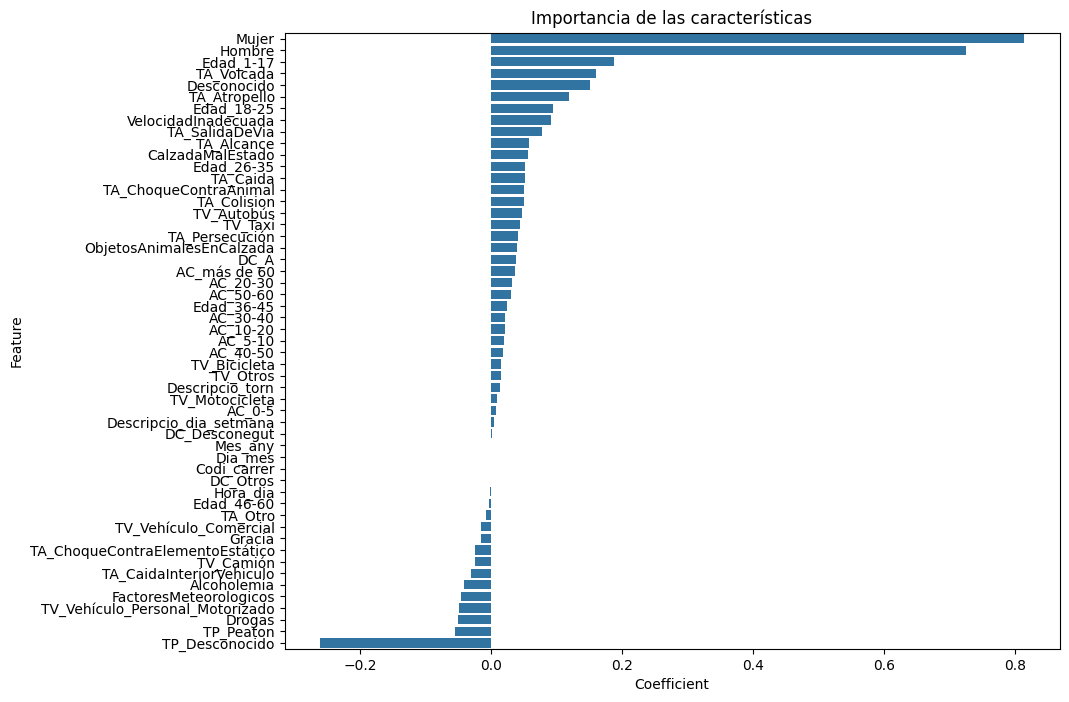

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Crear un DataFrame para visualizar los coeficientes junto con los nombres de las características
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Importancia de las características')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

El género de la persona es uno de los factores más importantes a la hora de predecir el numero de victimas.

###XGBoost

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir las características (X) excluyendo la columna objetivo y otras columnas no deseadas
columns_to_exclude = ['Numero_victimes','Numero_expedient','TP_Conductor','TP_Pasajero','Edad_más de 60','Edad_más de 60',
'Eixample','Sant_Marti','Sants_Montjuic','Sarria_Sant-Gervasi','Horta_Guinardo','Les_Corts','Sant_Andreu','Ciutat_Vella','Nou_Barris','Districte_Desconegut','Any','SinCausaMediata',
'Numero_vehicles_implicats','DC_B','TV_Automóvil','Numero_lesionats_lleus','Numero_lesionats_greus','Numero_morts']
X = df_classification.drop(columns=columns_to_exclude)
y = df_classification['Numero_victimes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = xgb_model.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas de evaluación
print(f"Métricas de evaluación:")
print(f"MAE (Error absoluto medio): {mae}")
print(f"MSE (Error cuadrático medio): {mse}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse}")
print(f"R^2 (Coeficiente de determinación): {r2}")

# Importancia de características
importance = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características
print("\nImportancia de las características:")
print(feature_importance)

Métricas de evaluación:
MAE (Error absoluto medio): 0.12449488776801917
MSE (Error cuadrático medio): 0.09231887285573802
RMSE (Raíz del error cuadrático medio): 0.3038402094123456
R^2 (Coeficiente de determinación): 0.8434332877494053

Importancia de las características:
                            Feature  Importance
52                   TP_Desconocido    0.802554
44                            Mujer    0.079318
43                           Hombre    0.043907
25                   TV_Motocicleta    0.004568
16                     TA_Atropello    0.004368
18  TA_ChoqueContraElementoEstático    0.003969
47                       Edad_18-25    0.003835
48                       Edad_26-35    0.003461
46                        Edad_1-17    0.003337
19         TA_CaidaInteriorVehiculo    0.003117
32                    DC_Desconegut    0.002910
51                        TP_Peaton    0.002515
15                       TA_Alcance    0.002348
45                      Desconocido    0.001972
29     

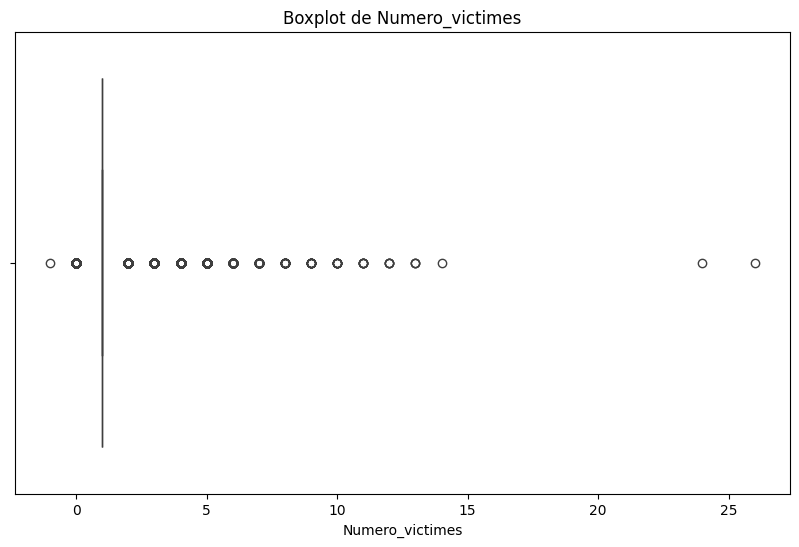

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_classification['Numero_victimes'])
plt.title('Boxplot de Numero_victimes')
plt.show()

In [ ]:
percentile_80 = df_classification['Numero_victimes'].quantile(0.80)

print(f'El 80% de los datos de Numero_victimes están por debajo de: {percentile_80}')

El 80% de los datos de Numero_victimes están por debajo de: 1.0


El 80% de numero de victimes está en 1 o menos victimas.

*Se ha hecho undrsampling de clase mayoritaria pero da peores resultados

In [ ]:
# Calcular la mediana de la columna 'Numero_victimes'
mediana_numero_victimas = df_classification['Numero_victimes'].median()

# Mostrar la mediana
print("La mediana de Numero_victimes es:", mediana_numero_victimas)

La mediana de Numero_victimes es: 1.0


In [ ]:
df_classification['Numero_victimes'].value_counts()

Numero_victimes
 1     45181
 2      9501
 0      5180
 3      1588
 4       501
 5       173
 6        86
 7        40
 8        20
 9        12
 10        9
 11        6
 12        4
 13        3
 24        1
 14        1
 26        1
-1         1
Name: count, dtype: int64

In [ ]:
df['Numero_lesionats_lleus'].value_counts()

Numero_lesionats_lleus
 1     44455
 2      9243
 0      6230
 3      1538
 4       493
 5       173
 6        83
 7        36
 8        20
 9        12
 10        9
 11        5
 12        4
 13        3
 21        1
 14        1
 25        1
-1         1
Name: count, dtype: int64

In [ ]:
df['Numero_lesionats_greus'].value_counts()

Numero_lesionats_greus
 0    61041
 1     1186
 2       75
 3        4
 4        1
-1        1
Name: count, dtype: int64

In [ ]:
df['Numero_morts'].value_counts()

Numero_morts
 0    62175
 1      131
 2        1
-1        1
Name: count, dtype: int64

#Tercera propuesta: clasificación victimas SÍ vs Victimas NO

In [ ]:
df_classification_2 = df.copy()

df_classification_2['HayVictimas'] = 0
df_classification_2.loc[(df_classification_2['Numero_victimes'] > 0), 'HayVictimas'] = 1


In [ ]:
# Definir las características (X) excluyendo la columna objetivo
X = df_classification_2.drop(columns=['Numero_victimes','Numero_expedient','HayVictimas','Numero_lesionats_lleus','Numero_lesionats_greus','Numero_morts','Les_Corts','Sant_Andreu',
                                      'Horta_Guinardo','DC_B','Any','Numero_vehicles_implicats','TP_Conductor','TP_Pasajero','TP_Peaton','TP_Desconocido','SinCausaMediata',
                                      'Hombre','TV_Automóvil'])

# Calcular el VIF para todas las características en el DataFrame X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Visualizar el resultado
vif_data

,Feature,VIF
0,Codi_carrer,2.712619
1,Descripcio_dia_setmana,4.893620
2,Mes_any,4.259015
3,Dia_mes,3.964182
4,Hora_dia,8.927475
5,Descripcio_torn,9.771222
6,Eixample,2.452618
7,Sant_Marti,1.573488
8,Sants_Montjuic,1.506155
9,Sarria_Sant-Gervasi,1.495875


In [ ]:
X = df_classification_2.drop(columns=['Numero_victimes', 'Numero_expedient', 'HayVictimas', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_morts', 'Les_Corts', 'Sant_Andreu',
                                      'Horta_Guinardo', 'DC_B', 'Any', 'Numero_vehicles_implicats', 'TP_Conductor', 'TP_Pasajero', 'TP_Peaton', 'TP_Desconocido', 'SinCausaMediata',
                                      'Hombre', 'TV_Automóvil'])

# Crear la variable objetivo
y = df_classification_2['HayVictimas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##XGBoost

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9928582891991654
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       989
           1       0.99      1.00      1.00     11473

    accuracy                           0.99     12462
   macro avg       0.99      0.96      0.98     12462
weighted avg       0.99      0.99      0.99     12462



In [ ]:
# Calcular recall y F1-score para los datos de entrenamiento
train_recall = recall_score(y_train, model.predict(X_train))
train_f1score = f1_score(y_train, model.predict(X_train))

# Calcular recall y F1-score para los datos de prueba
test_recall = recall_score(y_test, model.predict(X_test))
test_f1score = f1_score(y_test, model.predict(X_test))

# Imprimir los resultados
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model.predict(X_train),y_train):.4f}\n\tRecall: {train_recall:.4f}\n\tF1-score: {train_f1score:.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(model.predict(X_test),y_test):.4f}\n\tRecall: {test_recall:.4f}\n\tF1-score: {test_f1score:.4f}")

Metrics train:
	Accuracy score: 0.9991
	Recall: 0.9998
	F1-score: 0.9995
Metrics test:
	Accuracy score: 0.9929
	Recall: 0.9982
	F1-score: 0.9961


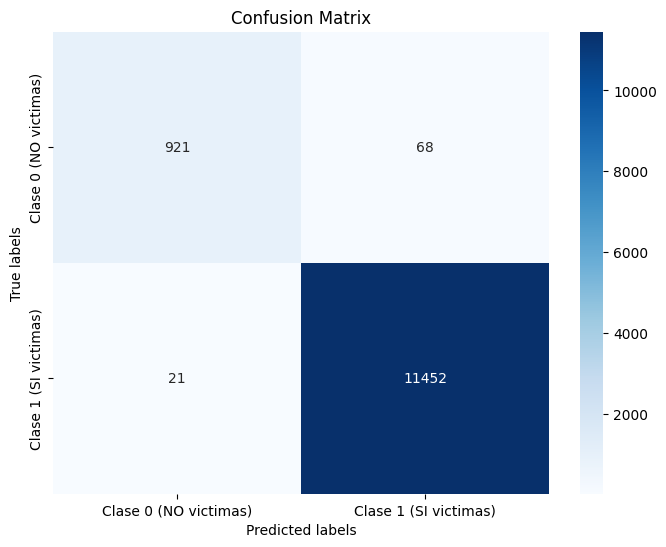

In [ ]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define las etiquetas de las clases
class_labels = ["Clase 0 (NO victimas)", "Clase 1 (SI victimas)"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

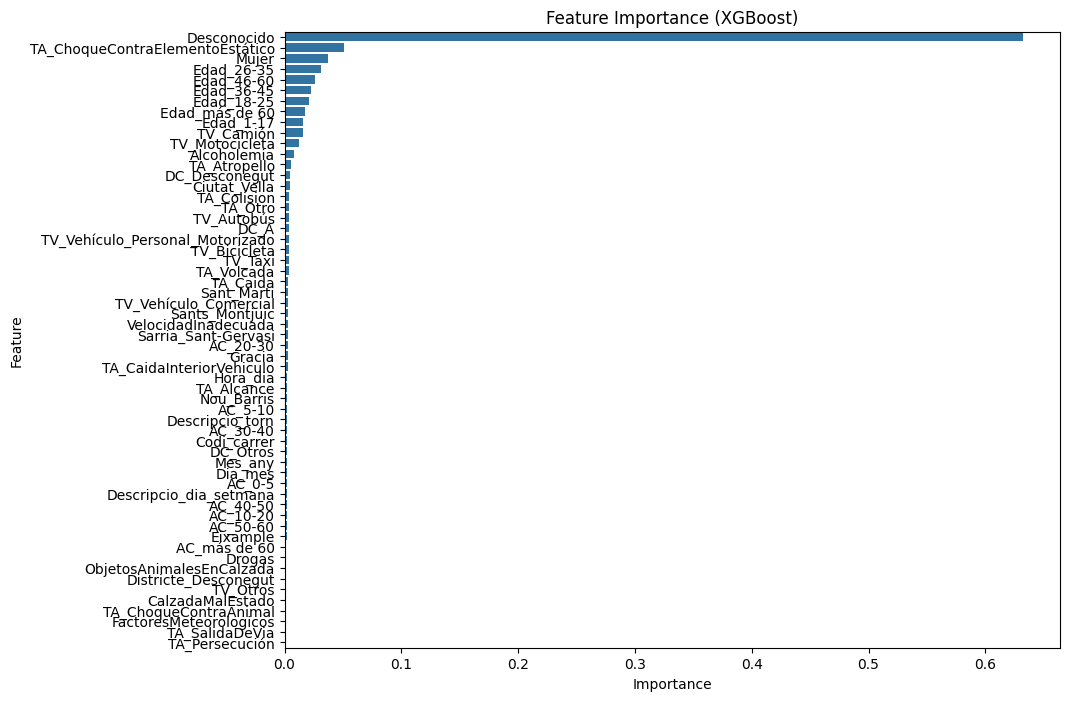

                            Feature  Importance
51                      Desconocido    0.631951
25  TA_ChoqueContraElementoEstático    0.050495
50                            Mujer    0.037000
54                       Edad_26-35    0.030878
56                       Edad_46-60    0.025925
55                       Edad_36-45    0.022605
53                       Edad_18-25    0.021118
57                   Edad_más de 60    0.017406
52                        Edad_1-17    0.016204
35                        TV_Camión    0.016035
32                   TV_Motocicleta    0.012469
14                      Alcoholemia    0.008518
23                     TA_Atropello    0.005874
39                    DC_Desconegut    0.005031
10                     Ciutat_Vella    0.004415
20                      TA_Colision    0.004167
24                          TA_Otro    0.004016
33                       TV_Autobús    0.003957
40                             DC_A    0.003909
37  TV_Vehículo_Personal_Motorizado    0

In [ ]:
# Obtener la importancia de las características del modelo XGBoost
feature_importance_xgb = model.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Mostrar el DataFrame
print(feature_importance_df)

In [ ]:
df_classification_2.HayVictimas.value_counts()

HayVictimas
1    57127
0     5181
Name: count, dtype: int64

In [ ]:
df_classification_2.count()

Numero_expedient          62308
Codi_carrer               62308
Descripcio_dia_setmana    62308
Any                       62308
Mes_any                   62308
                          ...  
TP_Conductor              62308
TP_Pasajero               62308
TP_Peaton                 62308
TP_Desconocido            62308
HayVictimas               62308
Length: 77, dtype: int64

##LIGHT-GBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un conjunto de datos LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Definir los parámetros del modelo
params = {
    'objective': 'binary',
    'metric': 'binary_error'  # Evaluación de error binario
}

# Entrenar el modelo

num_round = 100  # Número de iteraciones
params = {
    'objective': 'binary',
    'metric': 'binary_error',  # Evaluación de error binario
    'valid_sets': [test_data]  # Conjunto de validación
}
bst = lgb.train(params, train_data, num_round)

# Predecir en el conjunto de prueba
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_binary))


[LightGBM] [Warning] Unknown parameter: valid_sets
[LightGBM] [Warning] Unknown parameter: object
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x7a939eb32110>
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: 0x7a939eb31b10>
[LightGBM] [Warning] Unknown parameter: valid_sets
[LightGBM] [Warning] Unknown parameter: object
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Info] Number of positive: 45654, number of negative: 4192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 49846, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.915901 -> initscore=2.387913
[LightGBM] [Info] Start t

In [ ]:
train_recall = recall_score(y_train, (bst.predict(X_train, num_iteration=bst.best_iteration) >= 0.5).astype(int))
train_f1score = f1_score(y_train, (bst.predict(X_train, num_iteration=bst.best_iteration) >= 0.5).astype(int))

test_recall = recall_score(y_test, (bst.predict(X_test, num_iteration=bst.best_iteration) >= 0.5).astype(int))
test_f1score = f1_score(y_test, (bst.predict(X_test, num_iteration=bst.best_iteration) >= 0.5).astype(int))

print(f"Metrics train:\n\tAccuracy score: {accuracy_score((bst.predict(X_train, num_iteration=bst.best_iteration) >= 0.5).astype(int), y_train):.4f}\n\tRecall: {train_recall:.4f}\n\tF1-score: {train_f1score:.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score((bst.predict(X_test, num_iteration=bst.best_iteration) >= 0.5).astype(int), y_test):.4f}\n\tRecall: {test_recall:.4f}\n\tF1-score: {test_f1score:.4f}")

Metrics train:
	Accuracy score: 0.9977
	Recall: 0.9996
	F1-score: 0.9988
Metrics test:
	Accuracy score: 0.9927
	Recall: 0.9981
	F1-score: 0.9960


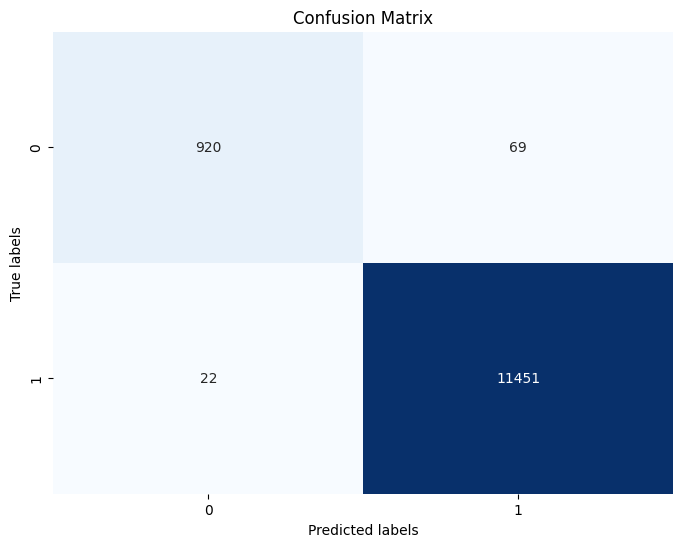

In [ ]:
#matriz de confusión
cm = confusion_matrix(y_test, (bst.predict(X_test, num_iteration=bst.best_iteration) >= 0.5).astype(int))


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##SVM

In [ ]:
from sklearn.svm import SVC

X = df_classification_2.drop(columns=['Numero_victimes', 'Numero_expedient', 'HayVictimas', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_morts', 'Les_Corts', 'Sant_Andreu',
                                      'Horta_Guinardo', 'DC_B', 'Any', 'Numero_vehicles_implicats', 'TP_Conductor', 'TP_Pasajero', 'TP_Peaton', 'TP_Desconocido', 'SinCausaMediata',
                                      'Hombre', 'TV_Automóvil'])

y = df_classification_2['HayVictimas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC()
svm_clf.fit(X_train, y_train)


y_pred_svm = svm_clf.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM:", accuracy_svm)


Accuracy SVM: 0.9206387417749959


In [ ]:
train_recall_svm = recall_score(y_train, svm_clf.predict(X_train))
train_f1score_svm = f1_score(y_train, svm_clf.predict(X_train))

test_recall_svm = recall_score(y_test, svm_clf.predict(X_test))
test_f1score_svm = f1_score(y_test, svm_clf.predict(X_test))

print(f"Metrics train SVM:\n\tAccuracy score: {accuracy_score(svm_clf.predict(X_train),y_train):.4f}\n\tRecall: {train_recall_svm:.4f}\n\tF1-score: {train_f1score_svm:.4f}")
print(f"Metrics test SVM:\n\tAccuracy score: {accuracy_score(svm_clf.predict(X_test),y_test):.4f}\n\tRecall: {test_recall_svm:.4f}\n\tF1-score: {test_f1score_svm:.4f}")

Metrics train SVM:
	Accuracy score: 0.9159
	Recall: 1.0000
	F1-score: 0.9561
Metrics test SVM:
	Accuracy score: 0.9206
	Recall: 1.0000
	F1-score: 0.9587


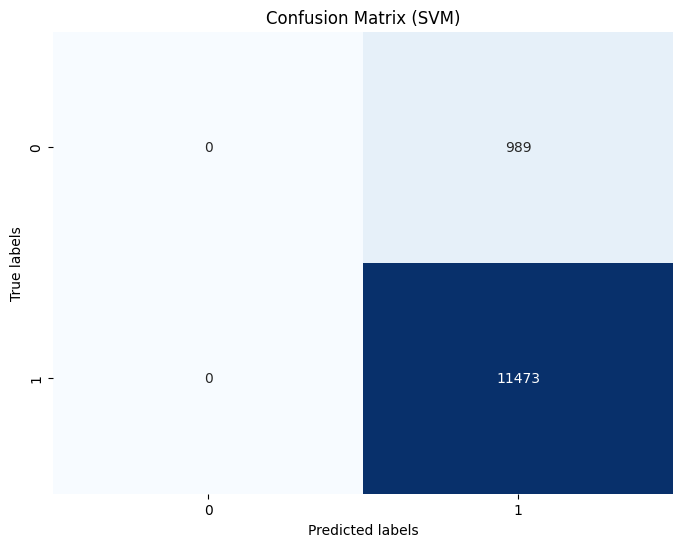

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVM)')
plt.show()

#Limpieza (Eliminar (?) )

In [ ]:
df_classification['Numero_lesionats_lleus'].value_counts()

Numero_lesionats_lleus
1     44455
2      9243
0      6230
3      1538
4       493
5       173
6        83
7        36
8        20
9        12
10        9
11        5
12        4
13        3
21        1
14        1
25        1
Name: count, dtype: int64

In [ ]:
df_classification[df_classification['Numero_lesionats_lleus']==21]

,Numero_expedient,Descripcio_dia_setmana,Any,Mes_any,Dia_mes,Hora_dia,Descripcio_torn,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Codi_carrer6,Eixample,Sant_Marti,Sants_Montjuic,Sarria_Sant-Gervasi,Horta_Guinardo,Les_Corts,Sant_Andreu,Ciutat_Vella,Nou_Barris,Gracia,Districte_Desconegut,SinCausaMediata,Alcoholemia,CalzadaMalEstado,VelocidadInadecuada,Drogas,ObjetosAnimalesEnCalzada,FactoresMeteorologicos,TA_Colision,TA_Caida,TA_Alcance,TA_Atropello,TA_Otro,TA_ChoqueContraElementoEstático,TA_CaidaInteriorVehiculo,TA_Volcada,TA_SalidaDeVia,TA_Persecución,TA_ChoqueContraAnimal,TV_Taxi,TV_Motocicleta,TV_Automóvil,TV_Autobús,TV_Vehículo_Comercial,TV_Camión,TV_Bicicleta,TV_Vehículo_Personal_Motorizado,TV_Otros,DC_B,DC_Desconegut,DC_A,DC_Otros,AC_0-5,AC_5-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_más de 60,Hombre,Mujer,Desconocido,Edad_1-17,Edad_18-25,Edad_26-35,Edad_36-45,Edad_46-60,Edad_más de 60,TP_Conductor,TP_Pasajero,TP_Peaton,TP_Desconocido,IndGravedadAccidente
6960,2016S006967,3,2016,9,14,2,3,0,21,3,24,1,701266,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,8,13,0,0,3,1,3,13,1,1,20,0,0,1


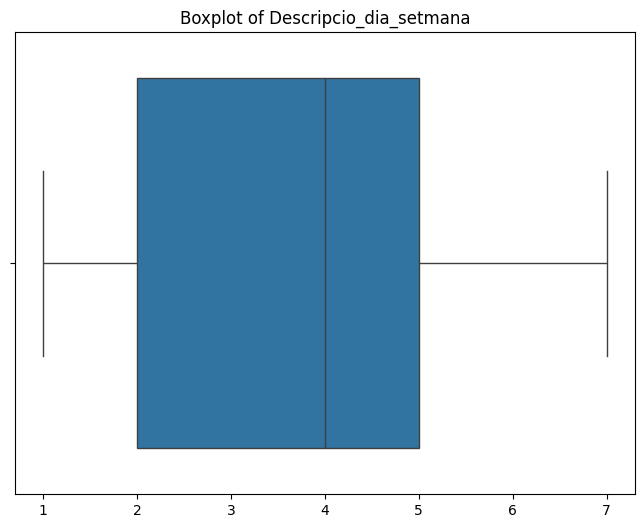

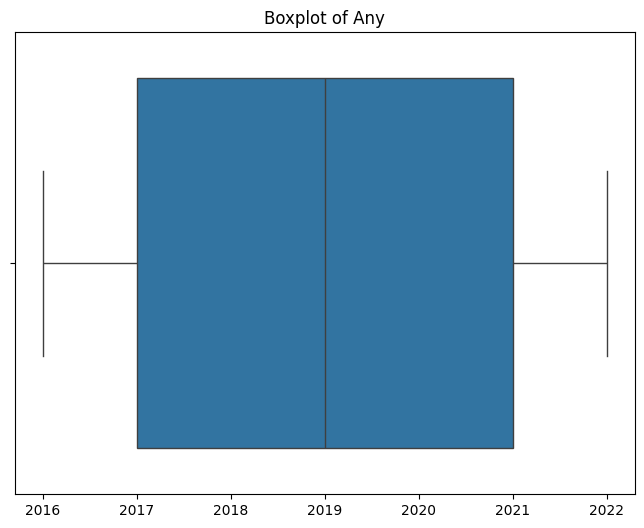

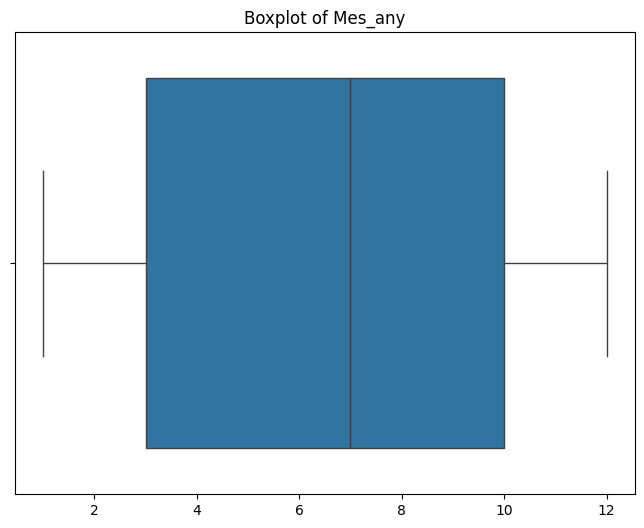

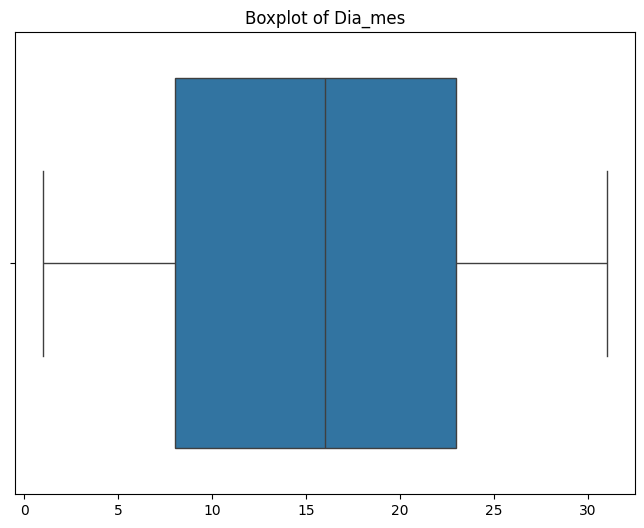

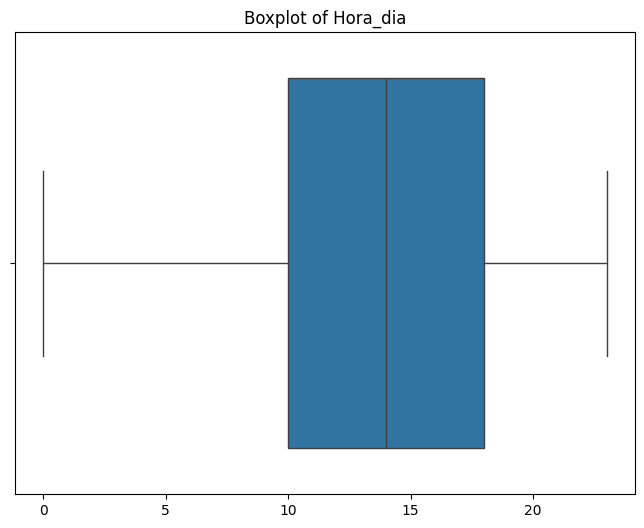

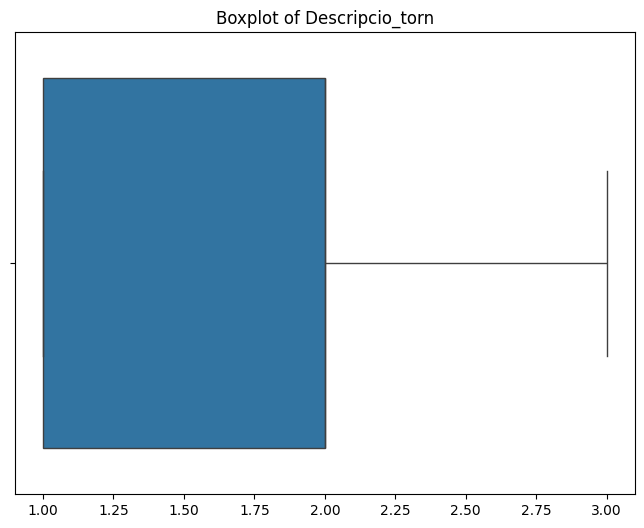

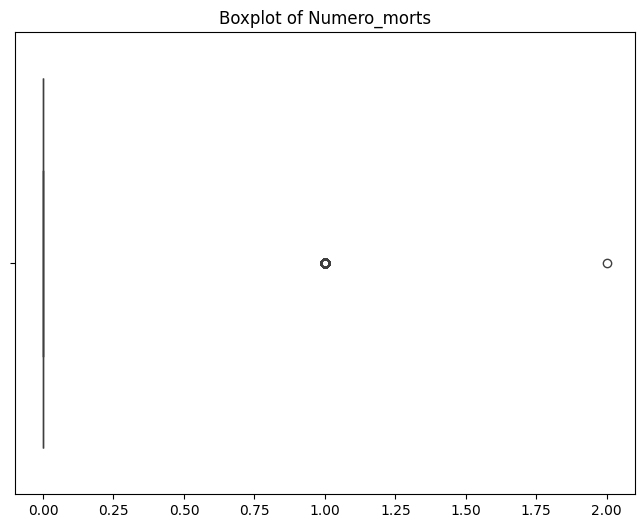

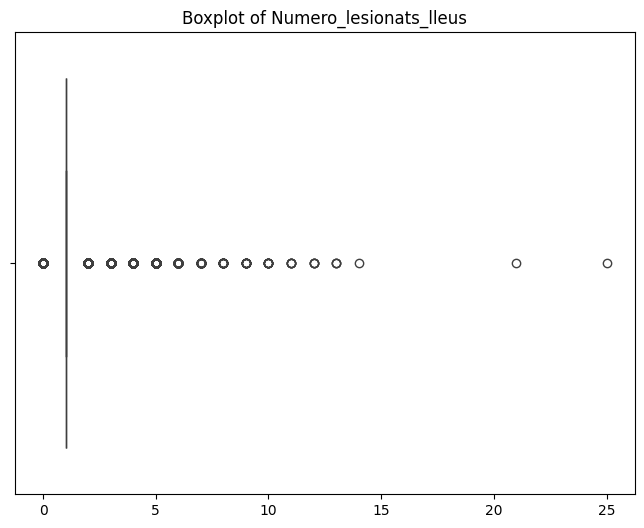

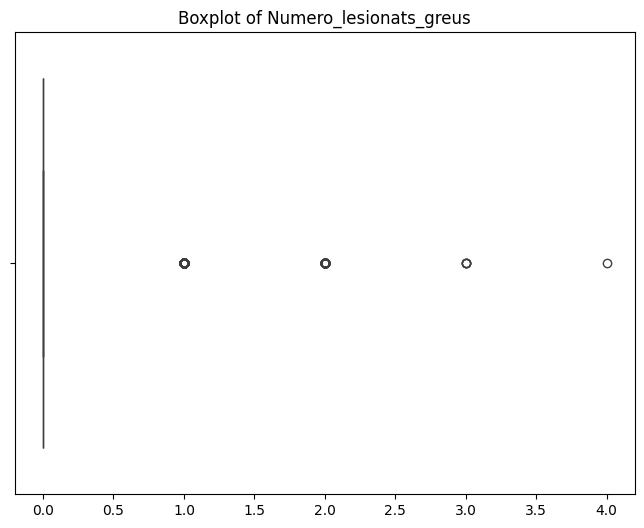

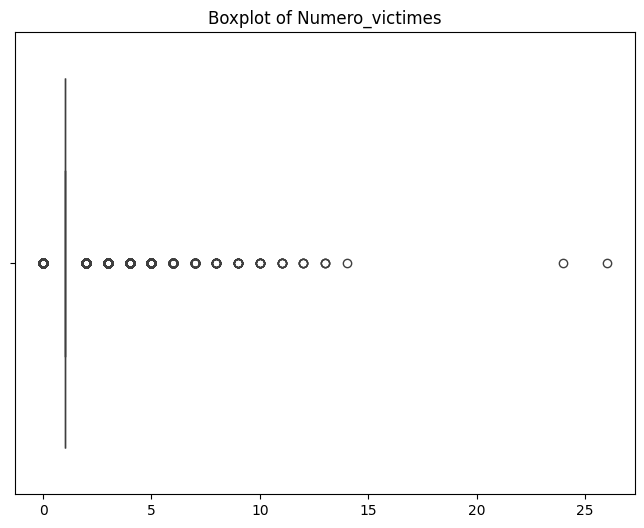

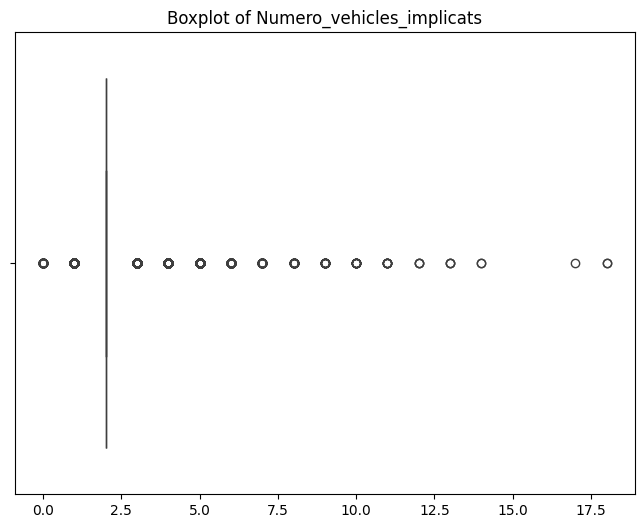

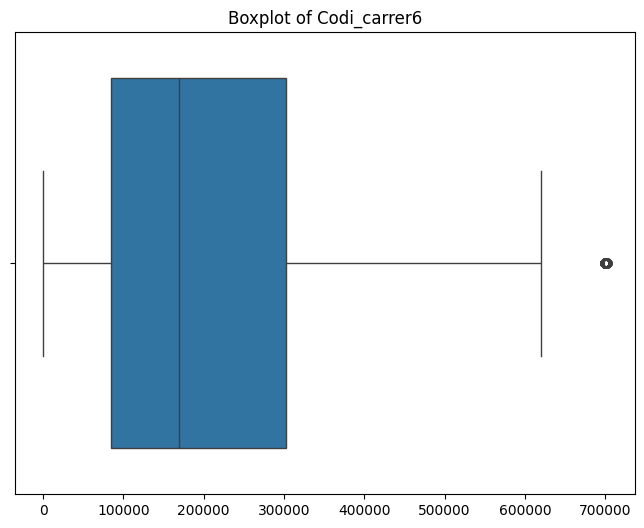

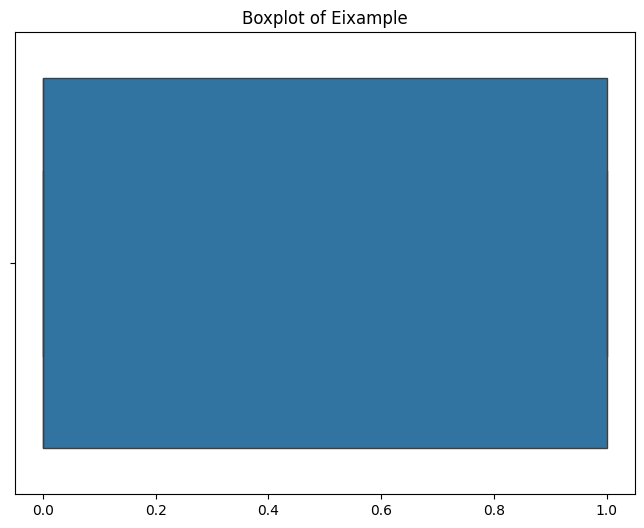

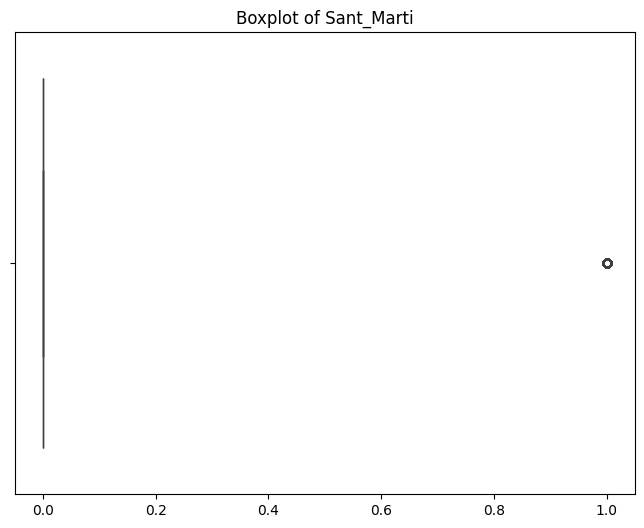

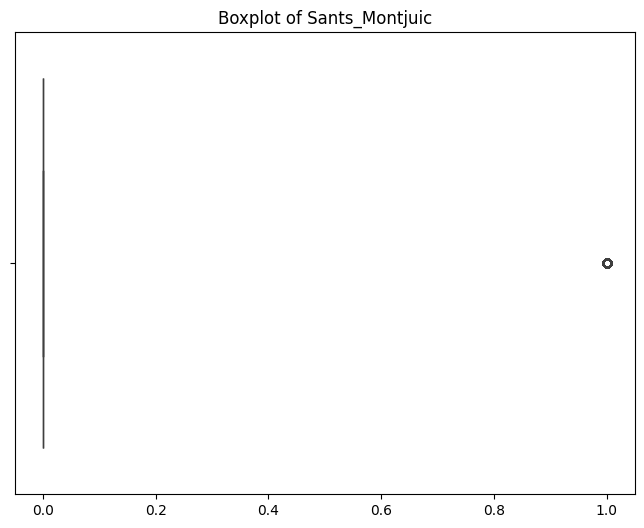

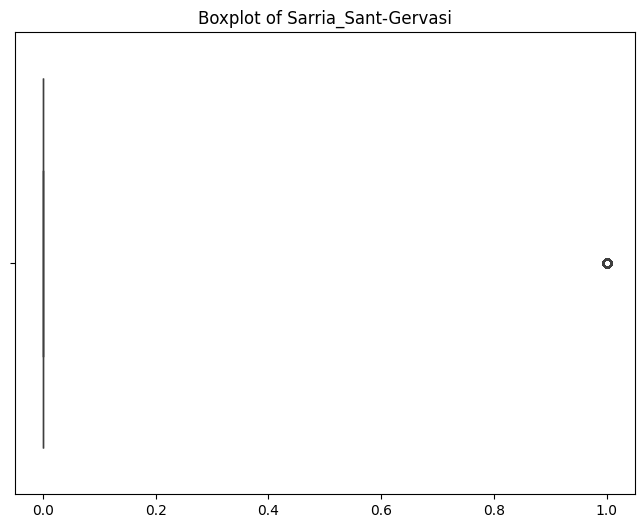

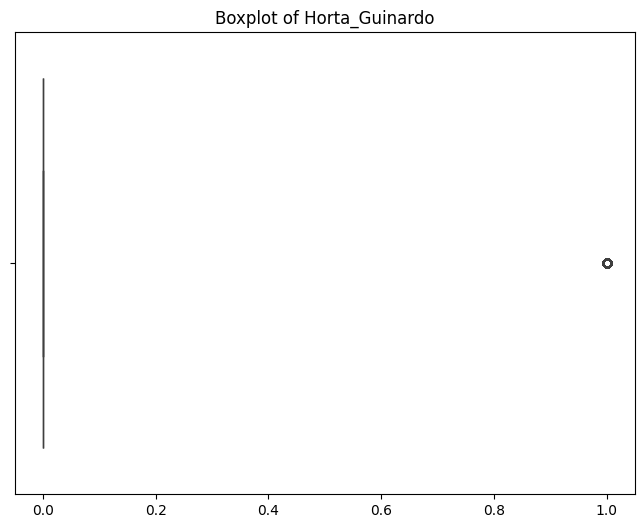

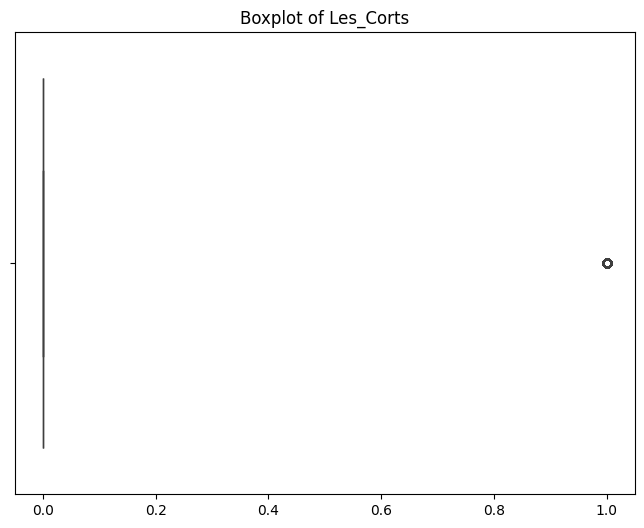

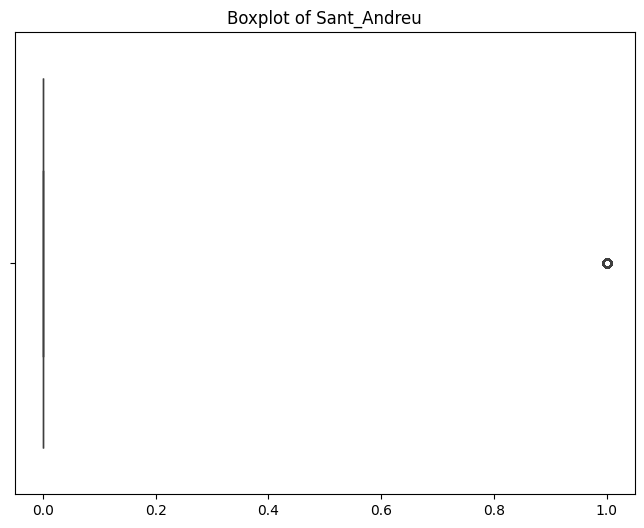

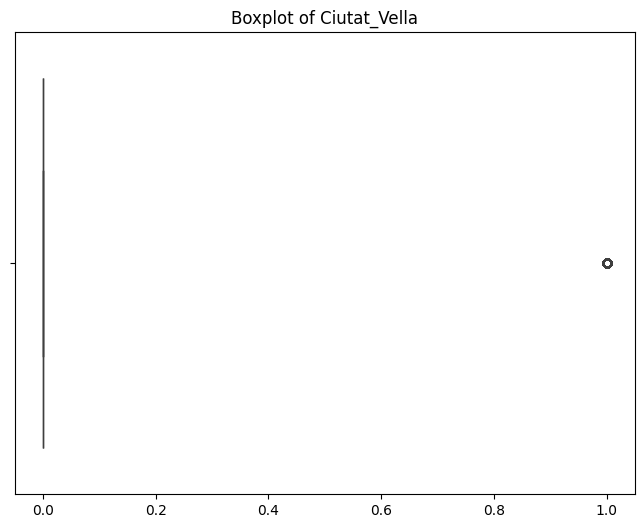

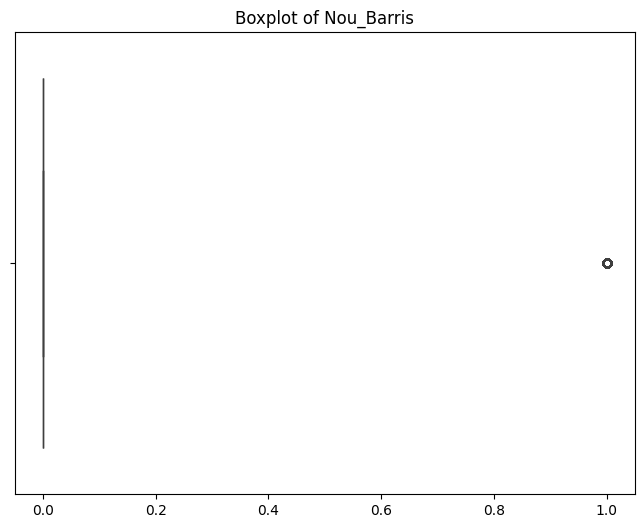

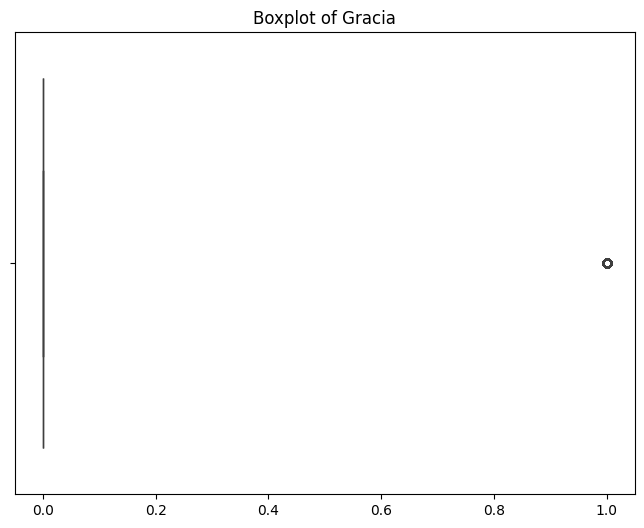

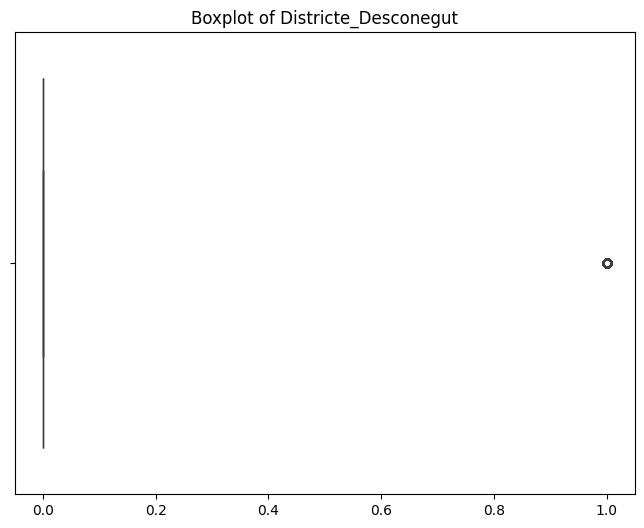

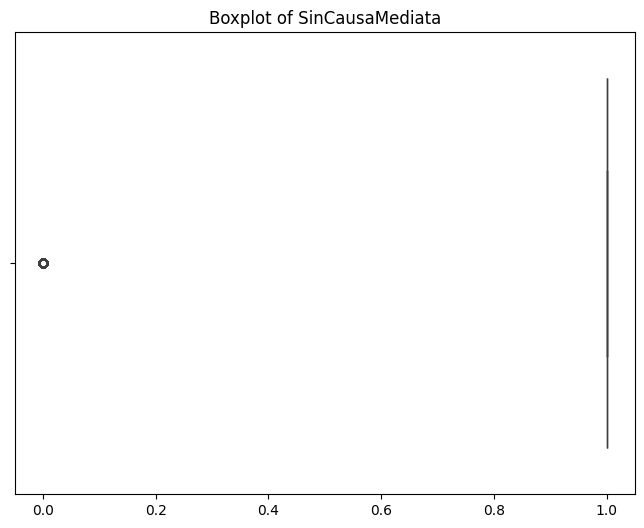

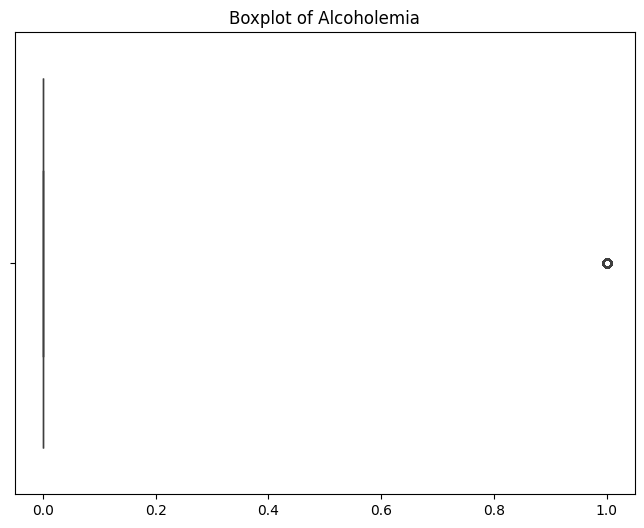

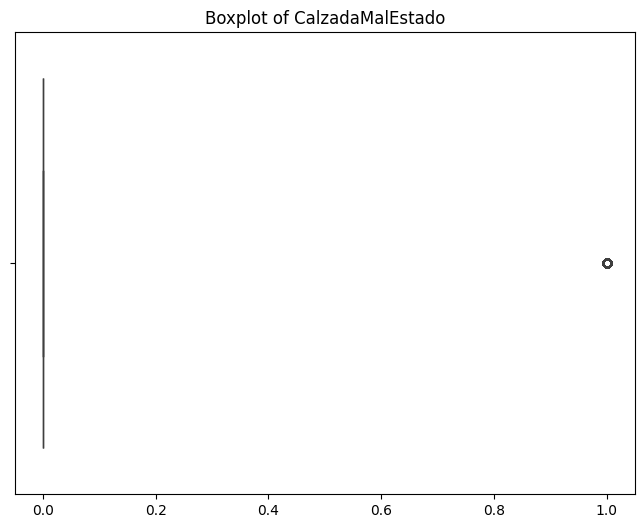

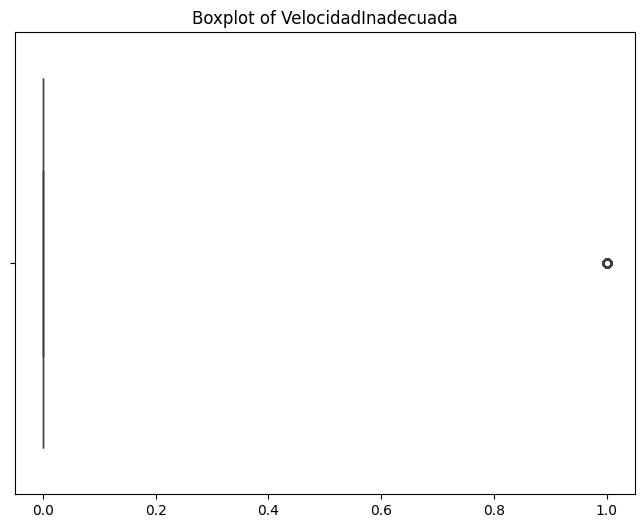

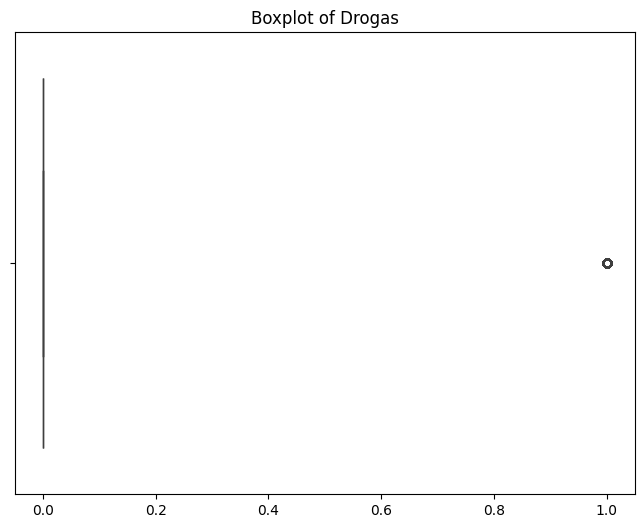

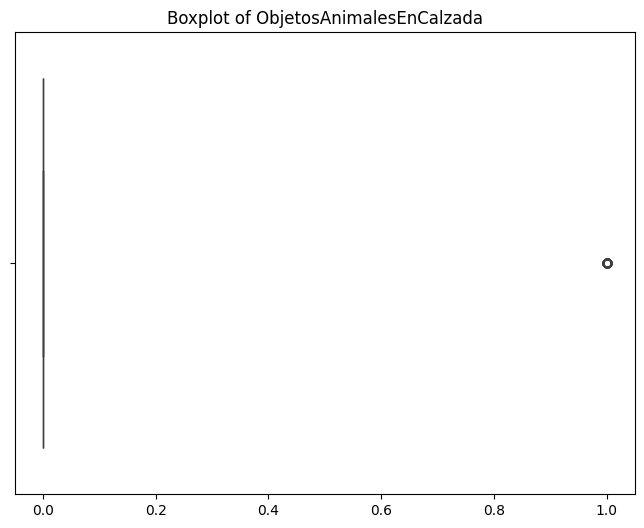

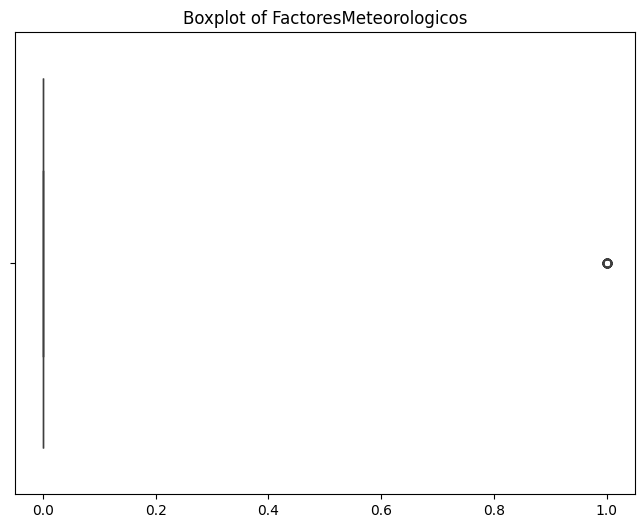

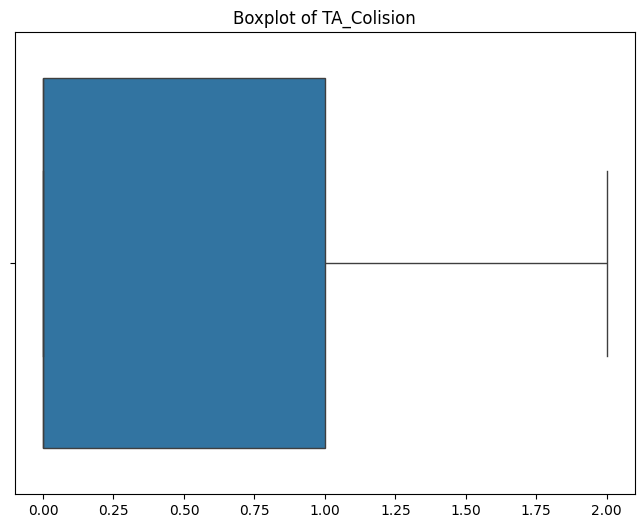

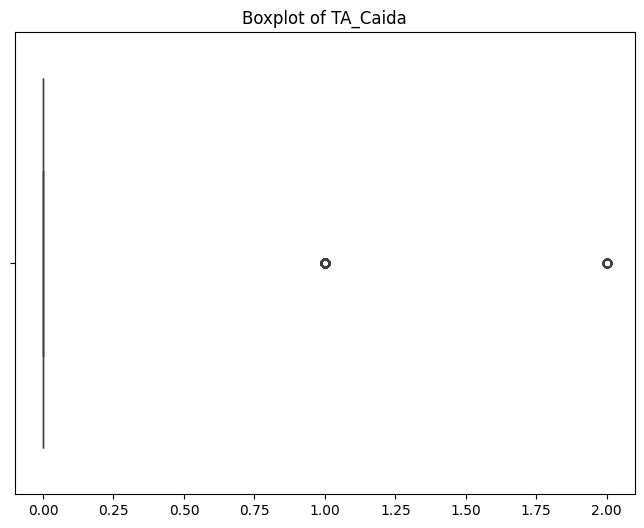

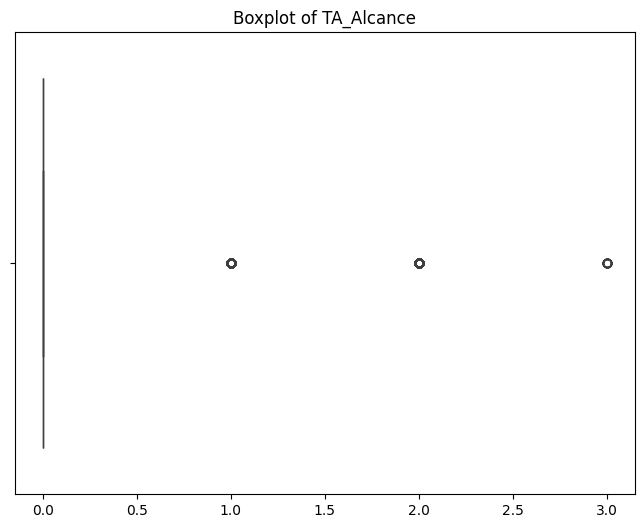

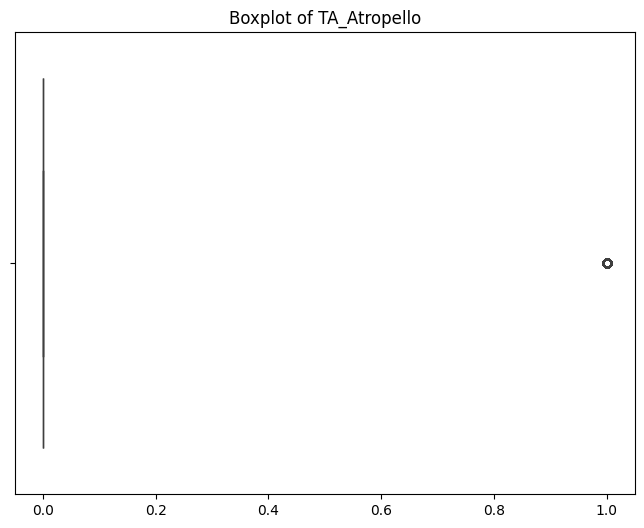

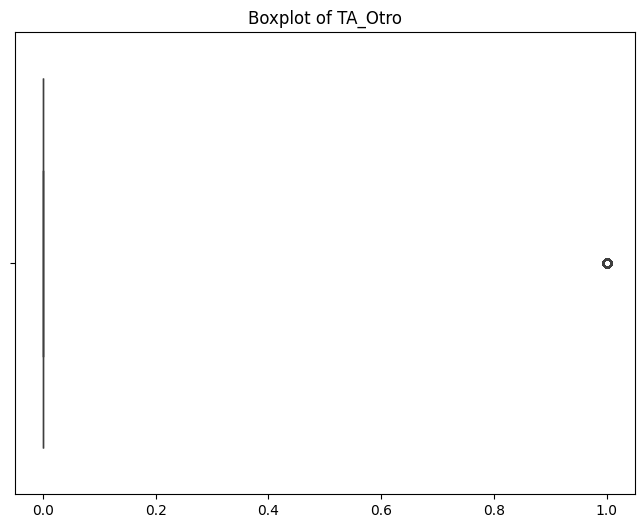

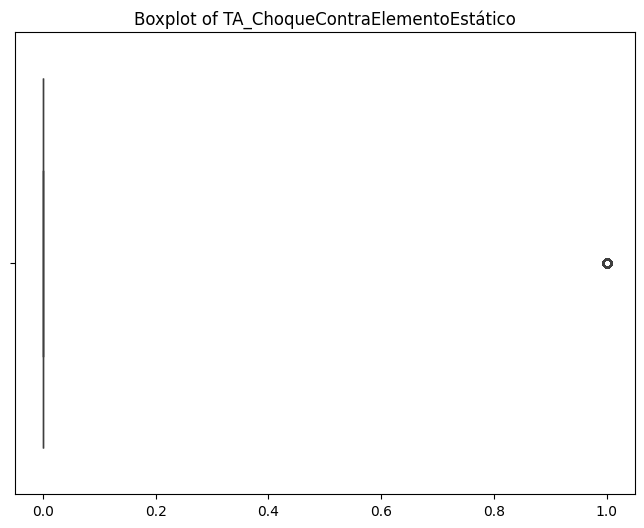

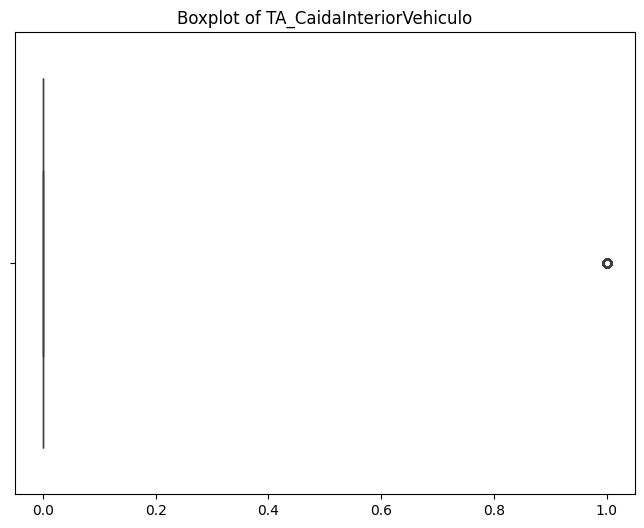

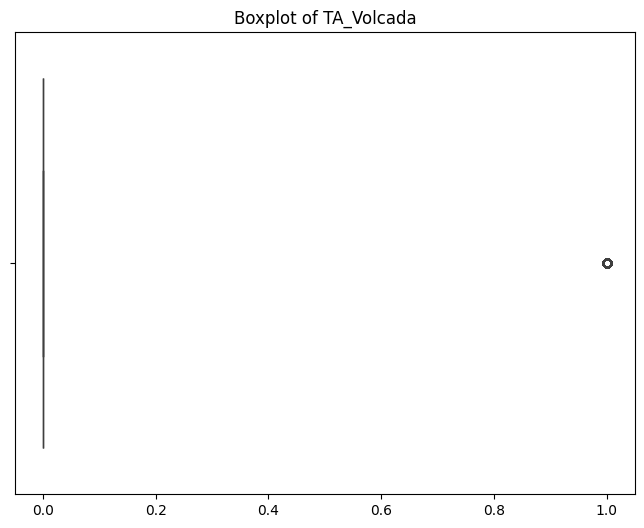

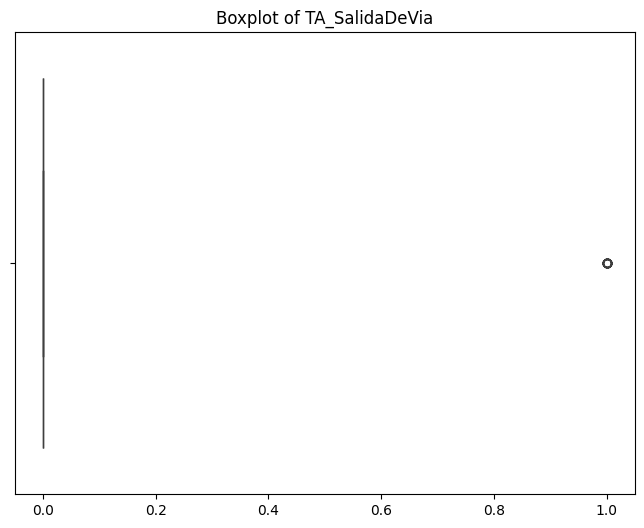

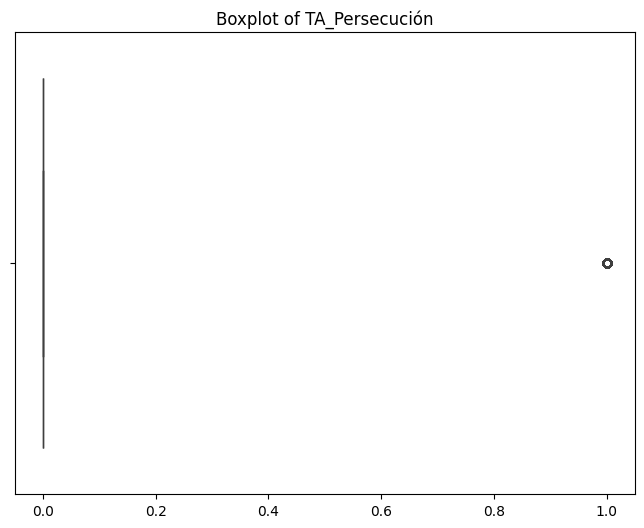

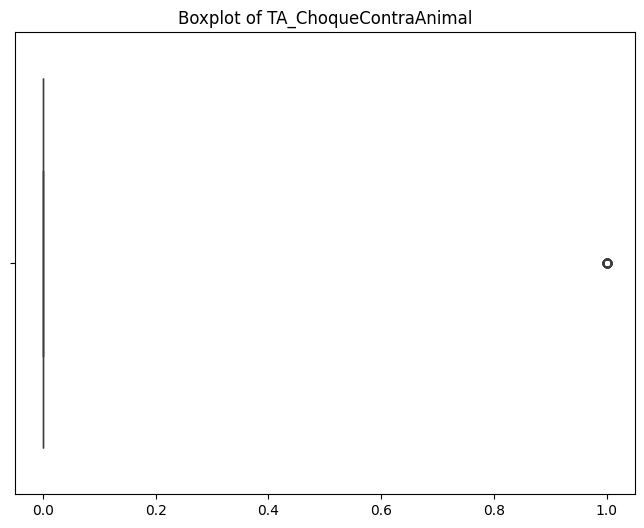

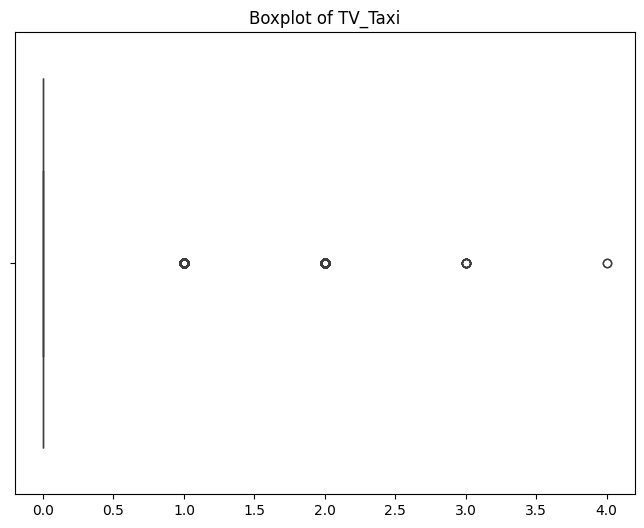

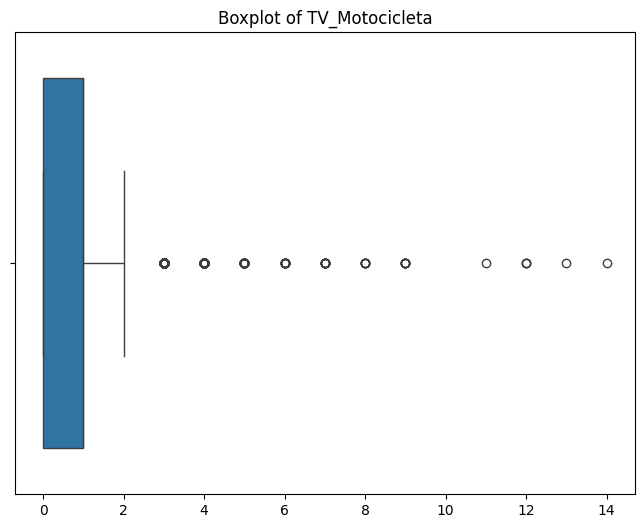

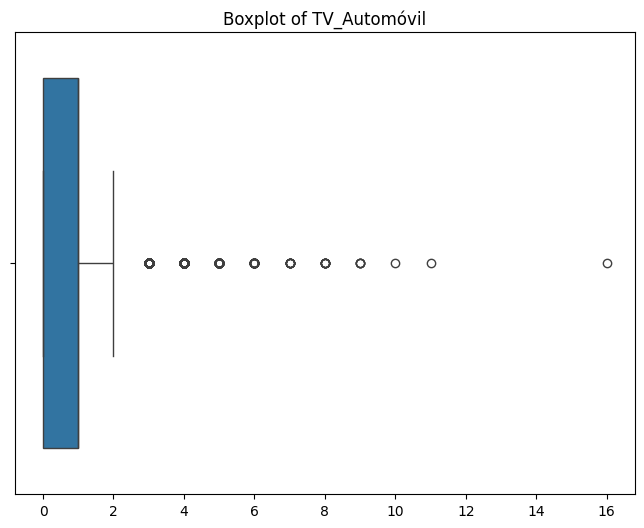

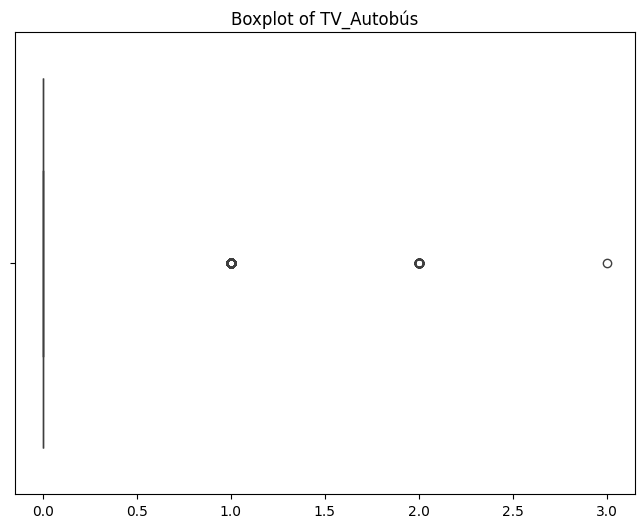

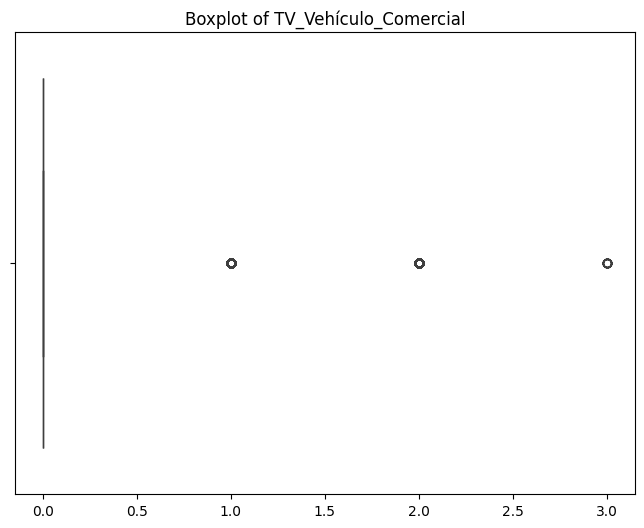

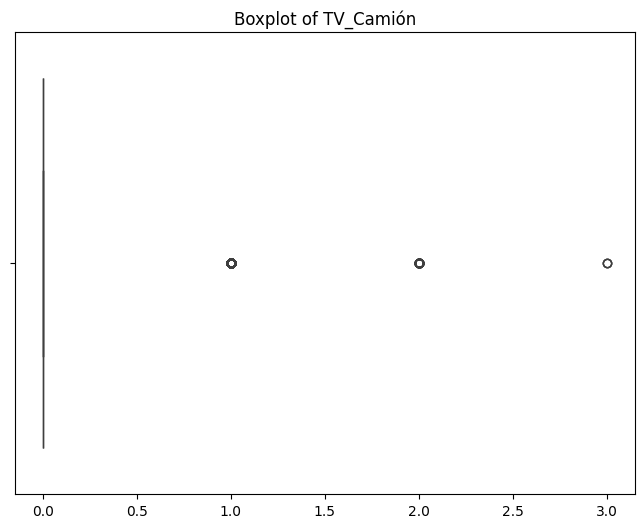

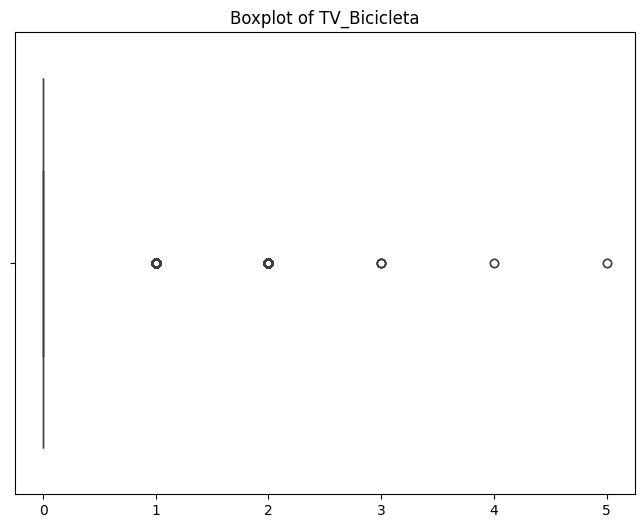

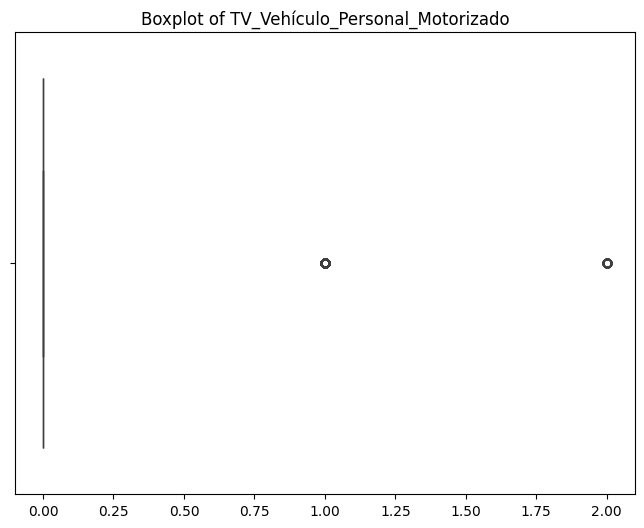

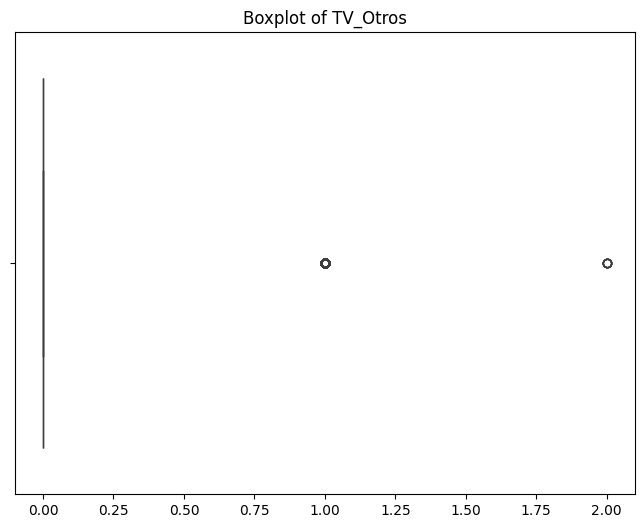

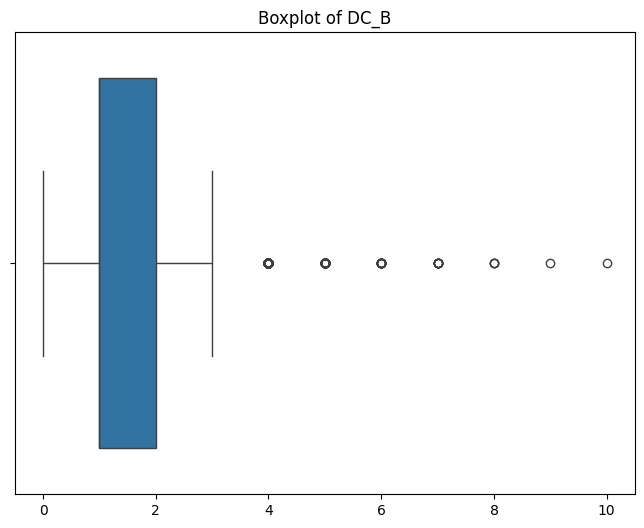

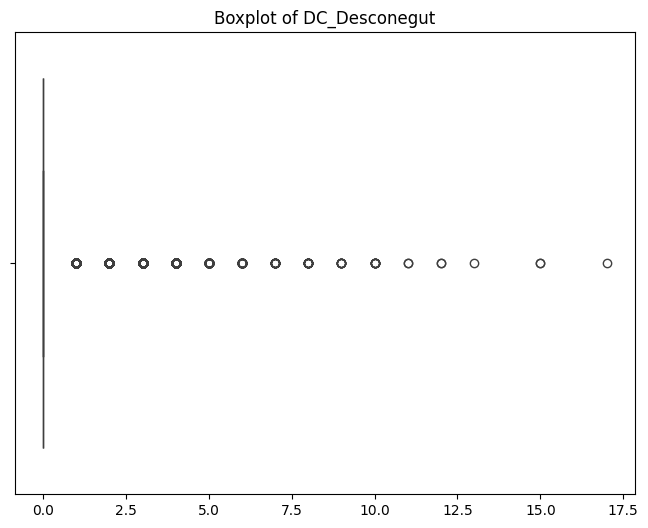

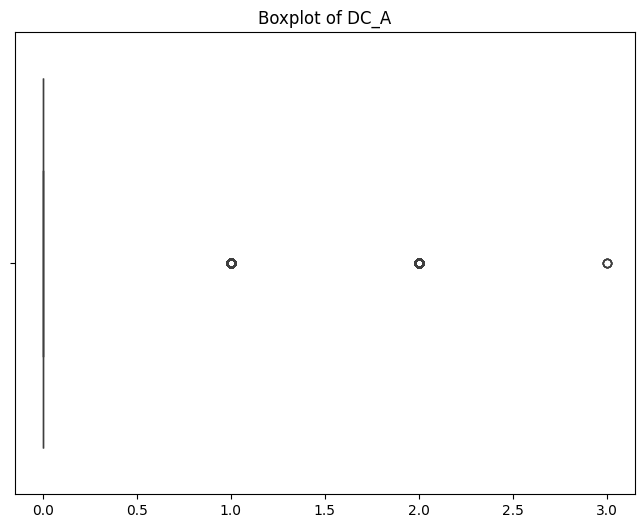

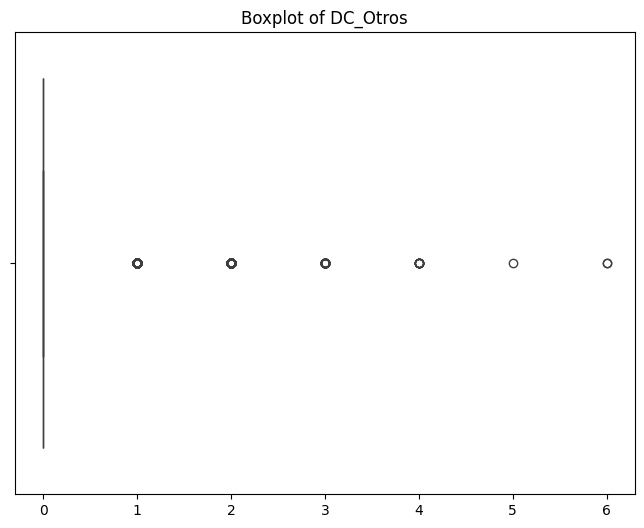

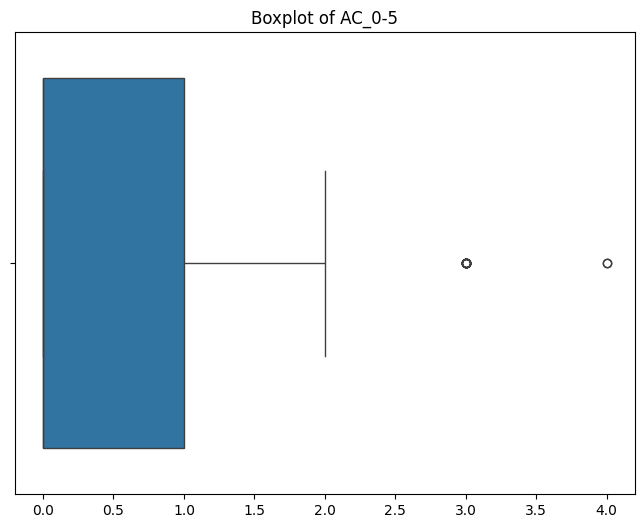

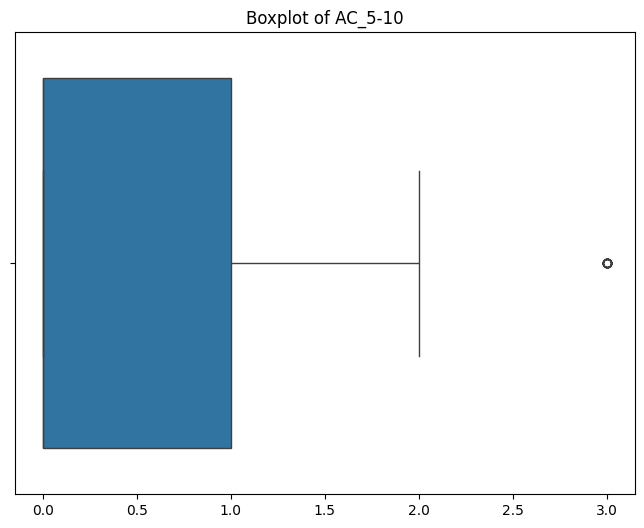

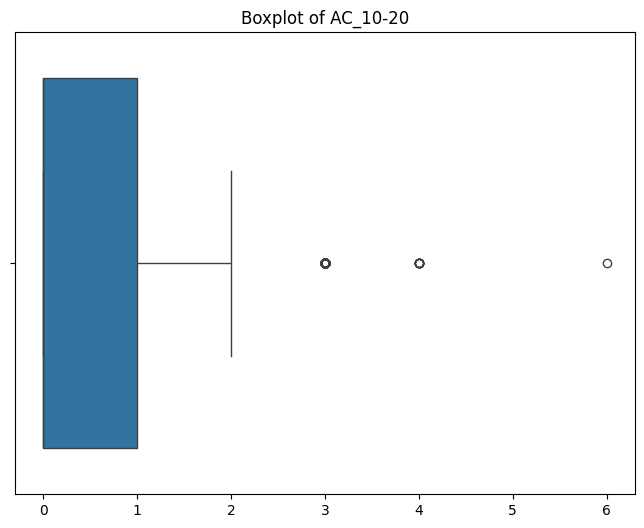

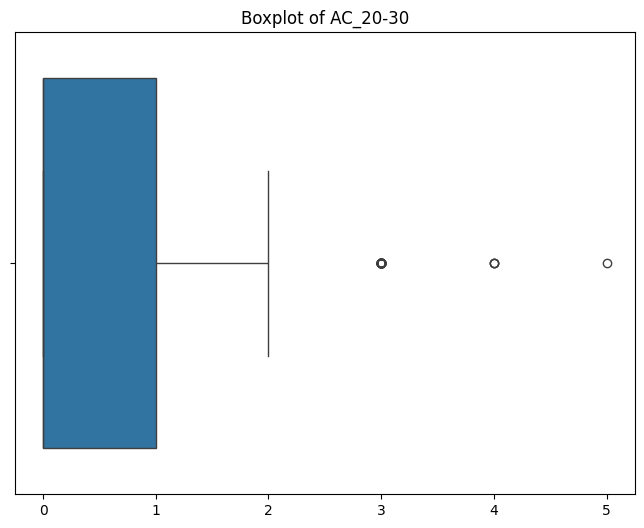

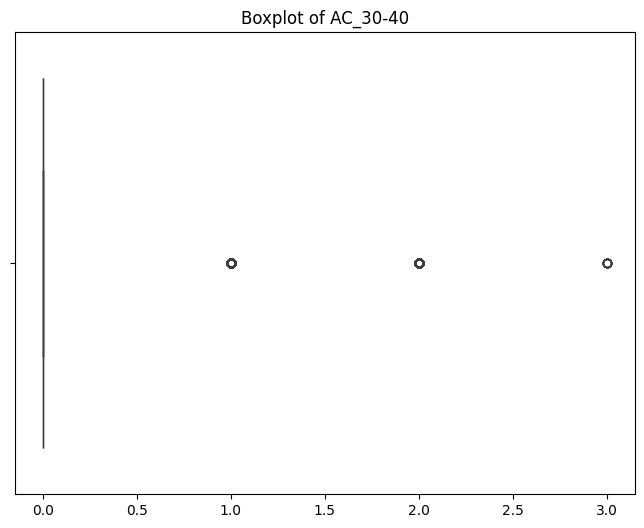

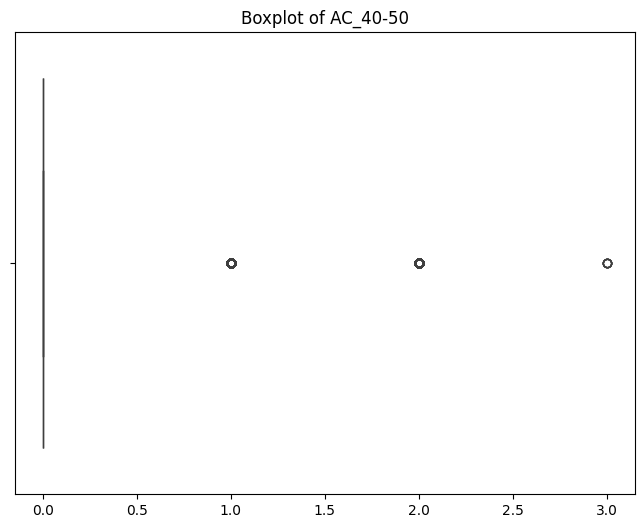

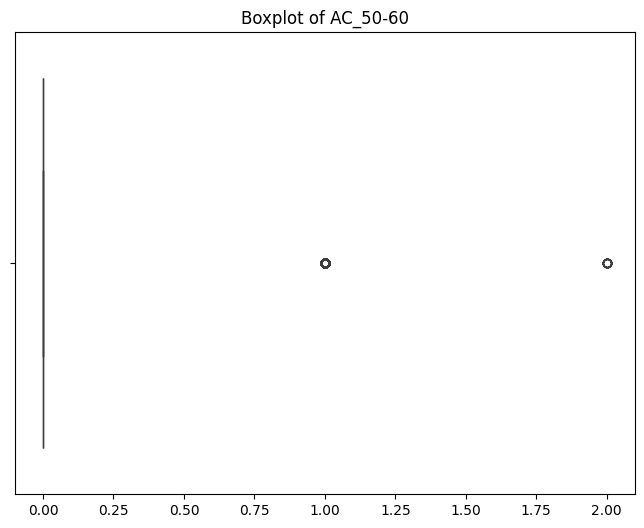

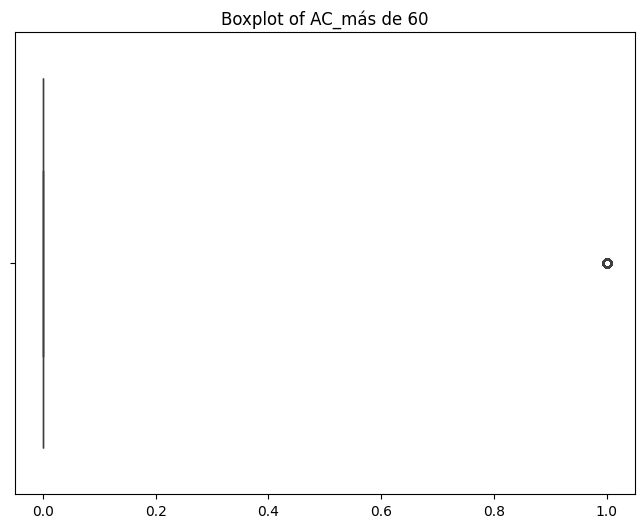

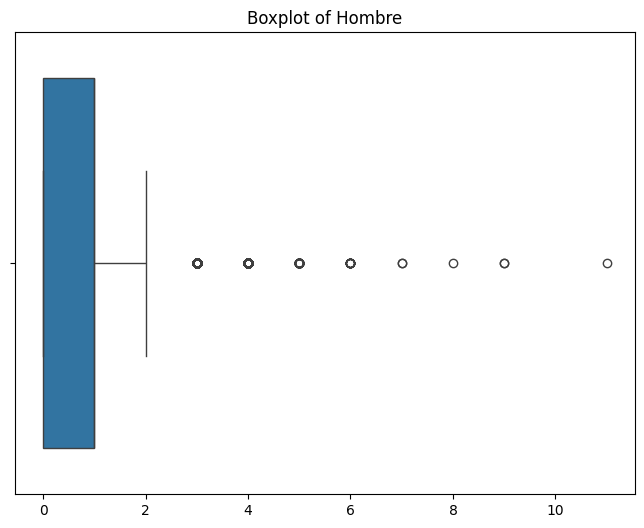

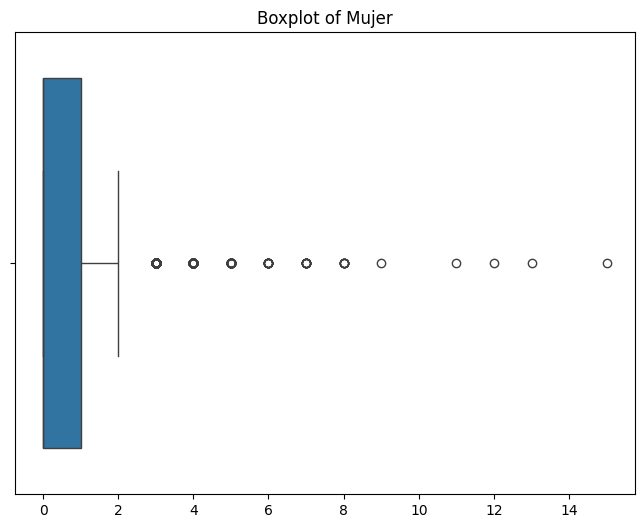

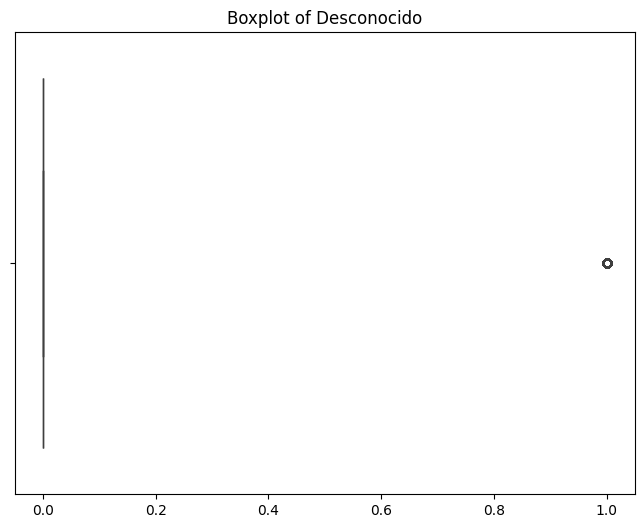

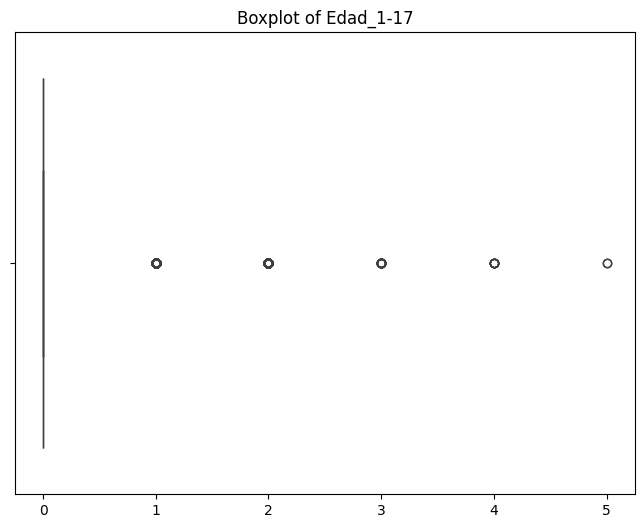

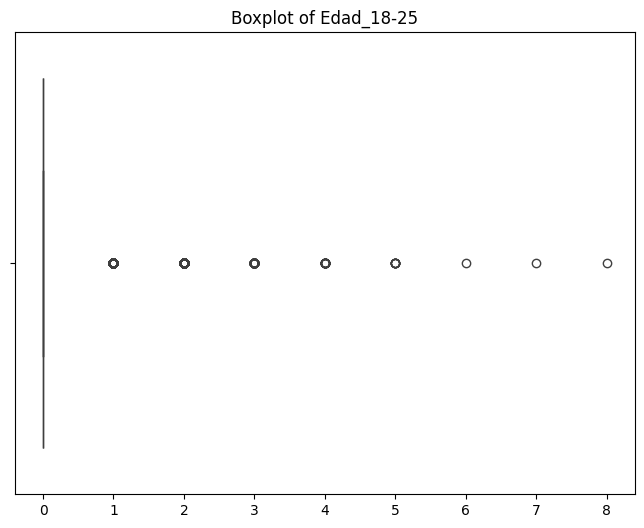

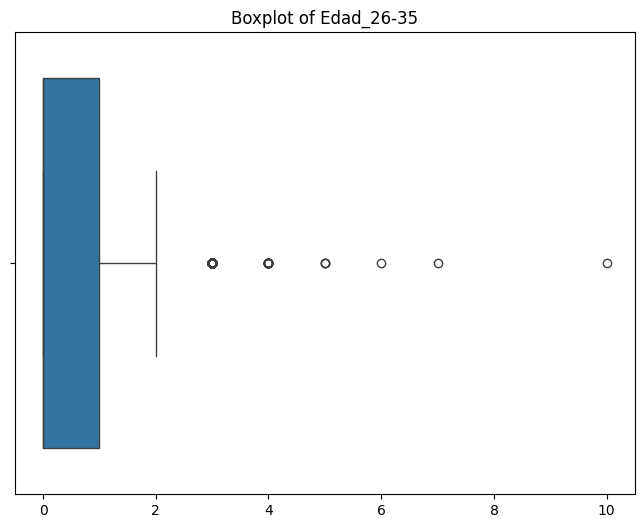

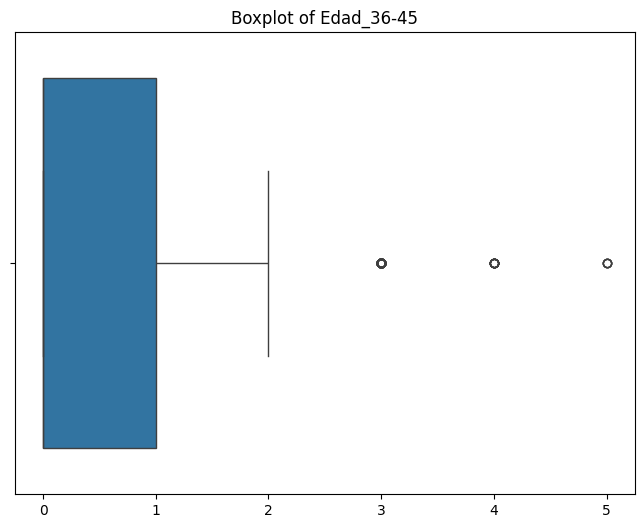

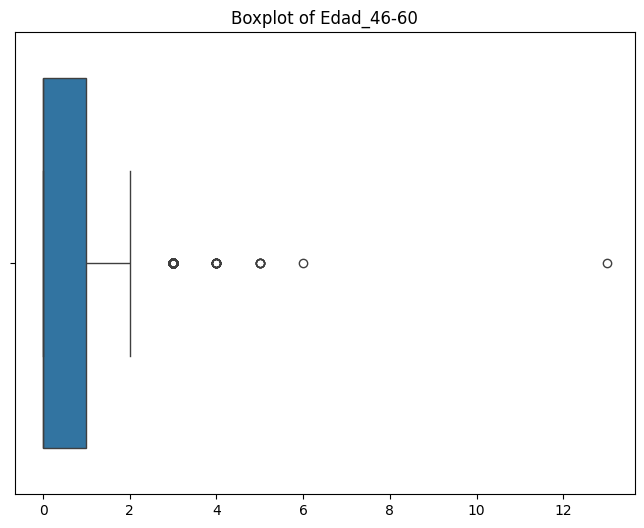

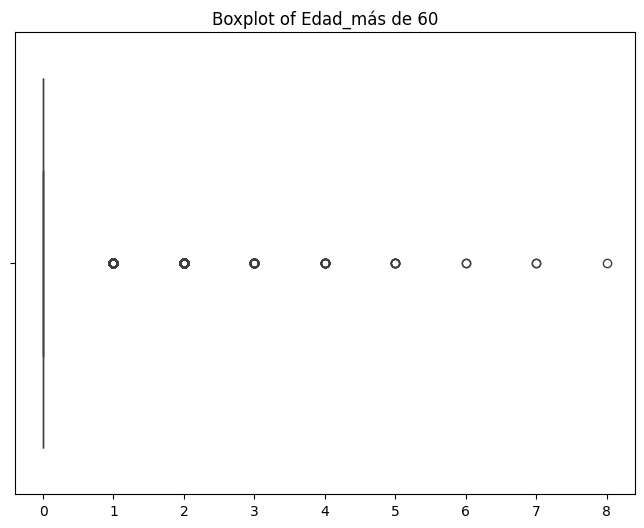

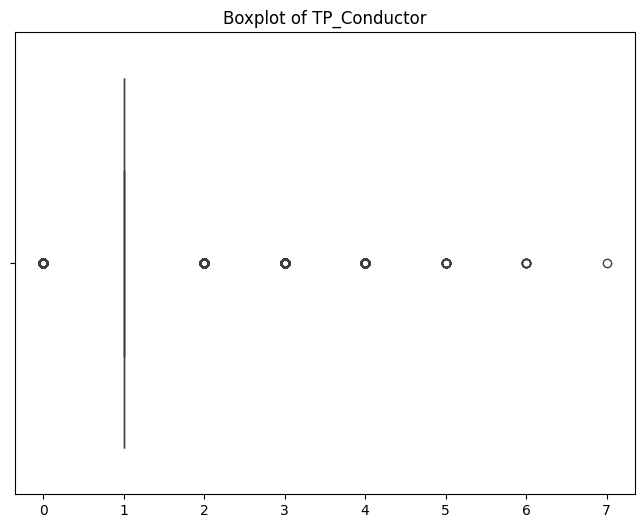

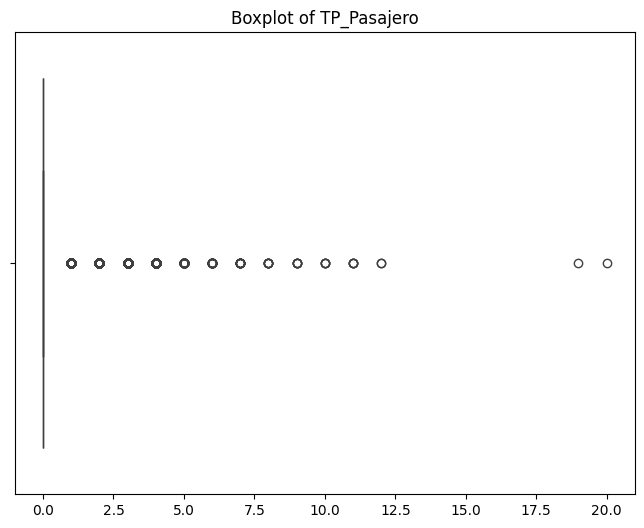

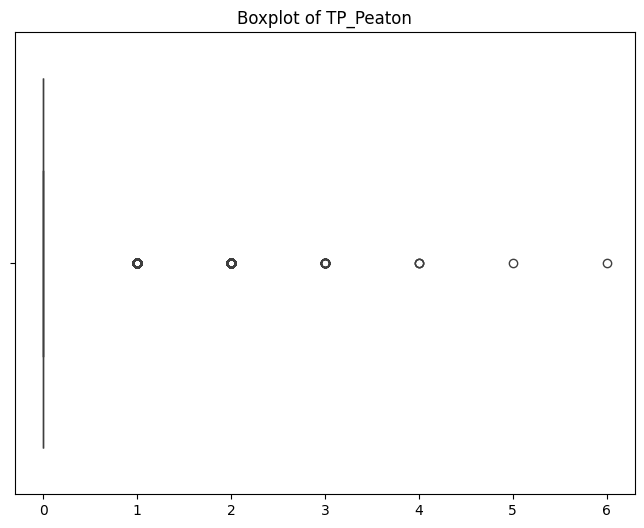

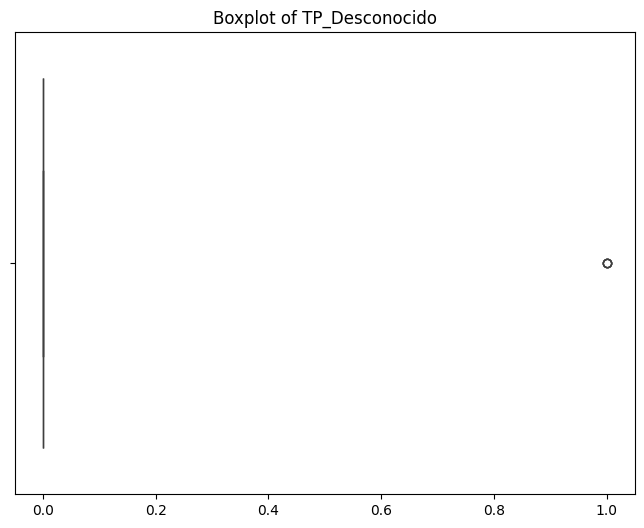

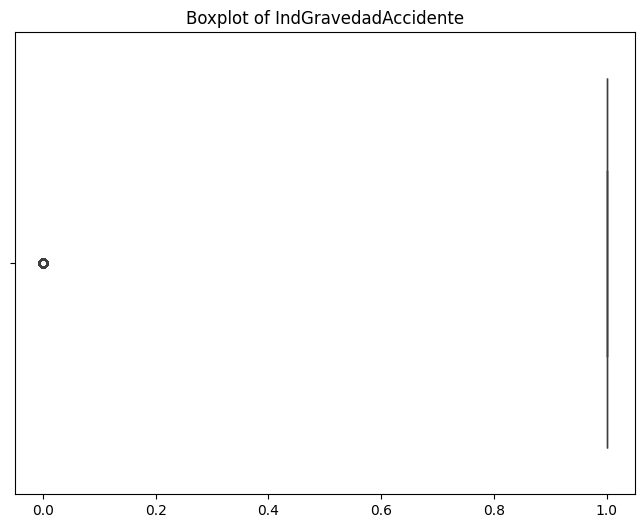

In [ ]:
# Select numerical columns
numerical_columns = df_classification.select_dtypes(include=['int64']).columns

# Create individual box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_classification[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.show()


##VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df_classification.columns
vif_data["VIF"] = [variance_inflation_factor(df_classification.values, i) for i in range(df_classification.shape[1])]

vif_data

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Localización accidentes

In [ ]:
df.query('Numero_vehicles_implicats > 10').head(50)

,Numero_expedient,Descripcio_dia_setmana,Any,Mes_any,Dia_mes,Hora_dia,Descripcio_torn,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Codi_carrer6,Eixample,Sant_Marti,Sants_Montjuic,Sarria_Sant-Gervasi,Horta_Guinardo,Les_Corts,Sant_Andreu,Ciutat_Vella,Nou_Barris,Gracia,Districte_Desconegut,SinCausaMediata,Alcoholemia,CalzadaMalEstado,VelocidadInadecuada,Drogas,ObjetosAnimalesEnCalzada,FactoresMeteorologicos,TA_Colision,TA_Caida,TA_Alcance,TA_Atropello,TA_Otro,TA_ChoqueContraElementoEstático,TA_CaidaInteriorVehiculo,TA_Volcada,TA_SalidaDeVia,TA_Persecución,TA_ChoqueContraAnimal,TV_Taxi,TV_Motocicleta,TV_Automóvil,TV_Autobús,TV_Vehículo_Comercial,TV_Camión,TV_Bicicleta,TV_Vehículo_Personal_Motorizado,TV_Otros,DC_B,DC_Desconegut,DC_A,DC_Otros,AC_0-5,AC_5-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_más de 60,Hombre,Mujer,Desconocido,Edad_1-17,Edad_18-25,Edad_26-35,Edad_36-45,Edad_46-60,Edad_más de 60,TP_Conductor,TP_Pasajero,TP_Peaton,TP_Desconocido
6985,2016S006995,4,2016,9,15,1,3,0,0,0,0,11,-1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,0,3,0,0,0,0,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8056,2016S008067,7,2016,10,23,7,1,0,1,0,1,11,143507,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,6,0,0,0,0,0,0,1,10,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
10282,2017S000147,6,2017,1,7,9,1,0,1,2,3,13,148806,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0,0,0,0,3,10,0,0,0,2,0,1,0,0,0,0,2,1,0,0,0,2,0,1,0,3,0,0,0
12019,2017S001886,3,2017,3,8,3,3,0,0,0,0,14,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,12,0,0,0,0,0,0,0,1,12,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13540,2017S003808,6,2017,4,29,4,3,0,0,0,0,11,-1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43998,2021S002120,6,2021,4,24,10,1,0,1,0,1,14,90502,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,13,1,0,0,0,0,0,0,1,13,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
44497,2021S002623,2,2021,5,18,23,3,0,0,0,0,13,-1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,2,0,1,0,0,0,0,2,10,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
46207,2021S004337,1,2021,8,2,2,3,0,2,0,2,11,350308,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,7,3,0,0,0,0,0,0,2,9,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,1,0,2,0,0,0
47577,2021S005715,2,2021,10,12,18,2,0,0,0,0,12,-1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.query('(Mes_any == 6) & (Dia_mes == 23) & (Any == 2016) & (Numero_morts > 0)').head(50)

,Numero_expedient,Descripcio_dia_setmana,Any,Mes_any,Dia_mes,Hora_dia,Descripcio_torn,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Codi_carrer6,Eixample,Sant_Marti,Sants_Montjuic,Sarria_Sant-Gervasi,Horta_Guinardo,Les_Corts,Sant_Andreu,Ciutat_Vella,Nou_Barris,Gracia,Districte_Desconegut,SinCausaMediata,Alcoholemia,CalzadaMalEstado,VelocidadInadecuada,Drogas,ObjetosAnimalesEnCalzada,FactoresMeteorologicos,TA_Colision,TA_Caida,TA_Alcance,TA_Atropello,TA_Otro,TA_ChoqueContraElementoEstático,TA_CaidaInteriorVehiculo,TA_Volcada,TA_SalidaDeVia,TA_Persecución,TA_ChoqueContraAnimal,TV_Taxi,TV_Motocicleta,TV_Automóvil,TV_Autobús,TV_Vehículo_Comercial,TV_Camión,TV_Bicicleta,TV_Vehículo_Personal_Motorizado,TV_Otros,DC_B,DC_Desconegut,DC_A,DC_Otros,AC_0-5,AC_5-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_más de 60,Hombre,Mujer,Desconocido,Edad_1-17,Edad_18-25,Edad_26-35,Edad_36-45,Edad_46-60,Edad_más de 60,TP_Conductor,TP_Pasajero,TP_Peaton,TP_Desconocido
4936,2016S004943,4,2016,6,23,8,1,1,0,0,1,2,143904,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.query('(Mes_any == 4) & (Dia_mes == 27) & (Any == 2016) & (TV_Bicicleta > 0)').head(50)

,Numero_expedient,Descripcio_dia_setmana,Any,Mes_any,Dia_mes,Hora_dia,Descripcio_torn,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Codi_carrer6,Eixample,Sant_Marti,Sants_Montjuic,Sarria_Sant-Gervasi,Horta_Guinardo,Les_Corts,Sant_Andreu,Ciutat_Vella,Nou_Barris,Gracia,Districte_Desconegut,SinCausaMediata,Alcoholemia,CalzadaMalEstado,VelocidadInadecuada,Drogas,ObjetosAnimalesEnCalzada,FactoresMeteorologicos,TA_Colision,TA_Caida,TA_Alcance,TA_Atropello,TA_Otro,TA_ChoqueContraElementoEstático,TA_CaidaInteriorVehiculo,TA_Volcada,TA_SalidaDeVia,TA_Persecución,TA_ChoqueContraAnimal,TV_Taxi,TV_Motocicleta,TV_Automóvil,TV_Autobús,TV_Vehículo_Comercial,TV_Camión,TV_Bicicleta,TV_Vehículo_Personal_Motorizado,TV_Otros,DC_B,DC_Desconegut,DC_A,DC_Otros,AC_0-5,AC_5-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_más de 60,Hombre,Mujer,Desconocido,Edad_1-17,Edad_18-25,Edad_26-35,Edad_36-45,Edad_46-60,Edad_más de 60,TP_Conductor,TP_Pasajero,TP_Peaton,TP_Desconocido
3181,2016S003185,3,2016,4,27,9,1,0,1,0,1,2,269108,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3204,2016S003208,3,2016,4,27,18,2,0,0,1,1,1,144601,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
